# Import Library

In [ ]:
# !pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MultiLabelBinarizer
from sklearn.decomposition import PCA

import re
import tqdm

# Loading Original Form Data

## Open CSV File

In [2]:
filename_form = 'Karakteristik Pembelajar Universitas Pertamina (Jawaban) - Form Responses 1.csv'

In [3]:
df_original = pd.read_csv(filename_form)

In [4]:
df_original.head()

,Timestamp,Nama,NIM,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,IPS Semester Genap 2021/2022,...,Preferensi Komunikasi Pembelajaran Kuliah.1,Apakah Anda Suka Ikut Lomba ?.1,Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?.1,Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Praktikum Pembelajaran Mesin Prodi Ilmu Komputer,Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?.2,"Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah.2",Jenis Online Course atau Platform Belajar Online Yang Diikuti.2,Preferensi Komunikasi Pembelajaran Kuliah.2,Apakah Anda Suka Ikut Lomba ?.2,Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?.2
0,10/04/2023 7:43:11,Louis pratama,103120114,Laki-laki,2000,Bersama Orang Tua,DKI Jakarta,Jakarta,3.01,2.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/04/2023 8:43:51,Mohammad Ammar Firdaus,103121024,Laki-laki,2001,Kos,Jawa Tengah,Pekalongan,3.25,3.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/04/2023 8:59:56,Dika Pramuidita,103121035,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Kota Administrasi Jakarta Timur,3.29,3.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/04/2023 9:01:48,Haryo Shandy Busiry,103121017,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Jakarta,3.33,3.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/04/2023 9:09:33,Wira Yudha Gunawan,103121012,Laki-laki,2003,Kos,Sumatera Utara,Sibolga,NaN,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 73 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Timestamp                                                                                                          141 non-null    object 
 1   Nama                                                                                                               141 non-null    object 
 2   NIM                                                                                                                141 non-null    int64  
 3   Jenis Kelamin                                                                                                      140 non-null    object 
 4   Tahun Lahir               

In [6]:
df_original.columns

Index(['Timestamp', 'Nama', 'NIM', 'Jenis Kelamin', 'Tahun Lahir',
       'Tempat Tinggal Saat Ini', 'Provinsi Asal Saat SMA',
       'Kota Asal Saat SMA', 'IPK Saat Ini', 'IPS Semester Genap 2021/2022',
       'IPS Semester Ganjil 2022/2023', 'Nilai Mata Kuliah Matematika Bisnis',
       'Nilai Mata Kuliah Bahasa Inggris I', 'Jumlah SKS Semester Ini',
       'Jumlah Mata Kuliah Mengulang',
       'Apakah di Semester Ini Anda Memiliki Beasiswa ?',
       'Jalur Pendaftaran Kampus', 'Jenis Sekolah / Pendidikan Sebelum Kuliah',
       'Jenis Sekolah SMA', 'Nilai Total UTBK', 'Nilai Total UN',
       'Nilai Matematika SMA/Sederajat Kelas 12', 'Pendidikan Terakhir Ibu',
       'Pendidikan Terakhir Ayah', 'Jumlah Saudara Kandung',
       'Siapakah Role Model / Panutan Anda di Keluarga ?',
       'Penghasilan Orang Tua', 'Jenis Tempat Tinggal Keluarga',
       'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sistem Informasi Manajemen',
       'Apakah Anda Meluangkan Waktu Kh

## Fill Missinput Class Name Data

In [7]:
df = df_original.copy()

In [8]:
df['Nama Kelas yang Diikuti'].value_counts(dropna=False)

Nama Kelas yang Diikuti
NaN                                                  56
Praktikum Pembelajaran Mesin Prodi Ilmu Komputer     44
Sains Data dan Pembelajaran Mesin dalam Geofisika    41
Name: count, dtype: int64

In [9]:
df['Nama Kelas yang Diikuti'] = df['Nama Kelas yang Diikuti'].fillna('Sistem Informasi Manajemen')

df['Nama Kelas yang Diikuti'].value_counts(dropna=False)

Nama Kelas yang Diikuti
Sistem Informasi Manajemen                           56
Praktikum Pembelajaran Mesin Prodi Ilmu Komputer     44
Sains Data dan Pembelajaran Mesin dalam Geofisika    41
Name: count, dtype: int64

## Combine Duplicated Column

In [10]:
dict_redundant_columns = {
    'Timestamp':None,
    'Nama':None,
    'NIM':None,
    'Nama Kelas yang Diikuti':['Nama Kelas yang Diikuti.1'],
    'Jenis Kelamin':None,
    'Tahun Lahir':None,
    'Tempat Tinggal Saat Ini':None,
    'Provinsi Asal Saat SMA':None,
    'Kota Asal Saat SMA':None,
    'IPK Saat Ini':['IPK Saat Ini.1'],
    'IPS Semester Genap 2021/2022':['IPS Semester Genap 2021/2022.1'],
    'IPS Semester Ganjil 2022/2023':['IPS Semester Ganjil 2022/2023.1'],
    'Nilai Mata Kuliah Matematika Bisnis':['Nilai Mata Kuliah Kalkulus I'],
    'Nilai Mata Kuliah Bahasa Inggris I':['Nilai Mata Kuliah Bahasa Inggris I.1'],
    'Jumlah SKS Semester Ini':['Jumlah SKS Semester Ini.1'],
    'Jumlah Mata Kuliah Mengulang':['Jumlah Mata Kuliah Mengulang.1'],
    'Apakah di Semester Ini Anda Memiliki Beasiswa ?':['Apakah di Semester Ini Anda Memiliki Beasiswa ?.1'],
    'Jalur Pendaftaran Kampus':None,
    'Jenis Sekolah / Pendidikan Sebelum Kuliah':None,
    'Jenis Sekolah SMA':None,
    'Nilai Total UTBK':None,
    'Nilai Total UN':None,
    'Nilai Matematika SMA/Sederajat Kelas 12':None,
    'Pendidikan Terakhir Ibu':None,
    'Pendidikan Terakhir Ayah':['Pendidikan Terakhir Bapak'],
    'Jumlah Saudara Kandung':None,
    'Siapakah Role Model / Panutan Anda di Keluarga ?':None,
    'Penghasilan Orang Tua':None,
    'Jenis Tempat Tinggal Keluarga':None,
    'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sistem Informasi Manajemen':[
        'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sains Data dan Pembelajaran Mesin dalam Geofisika',
        'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Praktikum Pembelajaran Mesin Prodi Ilmu Komputer'
    ],
    'Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?':[
        'Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?.1',
        'Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?.2'
    ],
    'Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah':[
        'Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah.1',
        'Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah.2'
    ],
    'Jenis Online Course atau Platform Belajar Online Yang Diikuti':[
        'Jenis Online Course atau Platform Belajar Online Yang Diikuti.1',
        'Jenis Online Course atau Platform Belajar Online Yang Diikuti.2'
    ],
    'Preferensi Komunikasi Pembelajaran Kuliah':[
        'Preferensi Komunikasi Pembelajaran Kuliah.1',
        'Preferensi Komunikasi Pembelajaran Kuliah.2'
    ],
    'Apakah Anda Suka Ikut Lomba ?':[
        'Apakah Anda Suka Ikut Lomba ?.1',
        'Apakah Anda Suka Ikut Lomba ?.2'
    ],
    'Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?':[
        'Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?.1',
        'Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?.2'
    ],
    'Sosial Media Apa yang Sering Anda Gunakan ?':None,
    'Kira-kira, Berapa Jam Rata-rata perhari Anda Menghabiskan Waktu Menggunakan Sosial Media ?':None,
    'Permainan Genre Apa Yang Anda Mainkan ?':None,
    'Jenis Organisasi Yang Diikuti':None,
    'Jenis Kegiatan UKM yang Diikuti':None,
    'Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?':None,
    'Apakah Anda Bekerja Semasa Kuliah ?':None,
    'Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?':None,
    'Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?':None,
    'Apakah anda bersedia untuk mengisi kuisioner lanjutan ?':None,
    'Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000':None,
    'Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan':None,
}

In [11]:
def merge_duplicated_column(dataframe_redundant, dict_redundant):
    dataframe = pd.DataFrame()
    for column, redundant in dict_redundant.items():
        if redundant == None:
            dataframe[column] = dataframe_redundant[column]
        else:
            columns_to_merge = [column] + redundant
            merged_columns = dataframe_redundant[columns_to_merge].fillna(method='bfill', axis=1)
            dataframe[column] = merged_columns.drop(columns=redundant)
    
    return dataframe

df = merge_duplicated_column(df, dict_redundant_columns)
df.head()

,Timestamp,Nama,NIM,Nama Kelas yang Diikuti,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,...,Permainan Genre Apa Yang Anda Mainkan ?,Jenis Organisasi Yang Diikuti,Jenis Kegiatan UKM yang Diikuti,Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?,Apakah Anda Bekerja Semasa Kuliah ?,"Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?","Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?",Apakah anda bersedia untuk mengisi kuisioner lanjutan ?,Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000,"Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan"
0,10/04/2023 7:43:11,Louis pratama,103120114,Sistem Informasi Manajemen,Laki-laki,2000,Bersama Orang Tua,DKI Jakarta,Jakarta,3.01,...,"Strategi, Multiplayer",ESPORT,Olahraga,<15,Ya,20-45,Part-Time,Ya,081282094244,luisp1750@gmail.com
1,10/04/2023 8:43:51,Mohammad Ammar Firdaus,103121024,Sistem Informasi Manajemen,Laki-laki,2001,Kos,Jawa Tengah,Pekalongan,3.25,...,Strategi,Tidak Mengikuti Organisasi,Tidak Mengikuti Kegiatan UKM,15-30,Tidak,20-45,Berdagang/Berjualan,Ya,087724122483,ammarwaex@gmail.com
2,10/04/2023 8:59:56,Dika Pramuidita,103121035,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Kota Administrasi Jakarta Timur,3.29,...,"Multiplayer, DOTA 2, GTA V ONLINE, VALORANT",Himpunan Mahasiswa,Tidak Mengikuti Kegiatan UKM,60-120,Tidak,<10,Freelance,Ya,+6287873564467,dikapramudita124@gmail.com
3,10/04/2023 9:01:48,Haryo Shandy Busiry,103121017,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Jakarta,3.33,...,Multiplayer,Himpunan Mahasiswa,Olahraga,30-60,Tidak,NaN,NaN,Ya,085210230865,haryoshandy@gmail.com
4,10/04/2023 9:09:33,Wira Yudha Gunawan,103121012,Sistem Informasi Manajemen,Laki-laki,2003,Kos,Sumatera Utara,Sibolga,NaN,...,"Aksi, Petualangan, Strategi, Teka-teki, Olahraga",Organisasi Keagamaan,Keagamaan,<15,Tidak,<10,Part-Time,Tidak,082260256378,NaN


# Data Cleaning

## Remove Duplicated Row of Same Student

In [12]:
df[df.duplicated(keep='last', subset=['NIM'])]

,Timestamp,Nama,NIM,Nama Kelas yang Diikuti,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,...,Permainan Genre Apa Yang Anda Mainkan ?,Jenis Organisasi Yang Diikuti,Jenis Kegiatan UKM yang Diikuti,Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?,Apakah Anda Bekerja Semasa Kuliah ?,"Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?","Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?",Apakah anda bersedia untuk mengisi kuisioner lanjutan ?,Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000,"Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan"
14,10/04/2023 9:25:07,BASTIAN JALI RITONGA,103121036,Sistem Informasi Manajemen,Laki-laki,2003,Bersama saudara,Sumatera Utara,"Sipirok,kab.Tapsel","3,1",...,"Petualangan, Olahraga",Organisasi Keagamaan,Keagamaan,60-120,Ya,10-20,ngojek,Ya,082163424945,jalobastian@gmail.com


In [13]:
df = df.drop_duplicates(keep='last', subset=['NIM']).reset_index(drop=True)
df[df.duplicated(keep=False, subset=['NIM'])]

,Timestamp,Nama,NIM,Nama Kelas yang Diikuti,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,...,Permainan Genre Apa Yang Anda Mainkan ?,Jenis Organisasi Yang Diikuti,Jenis Kegiatan UKM yang Diikuti,Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?,Apakah Anda Bekerja Semasa Kuliah ?,"Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?","Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?",Apakah anda bersedia untuk mengisi kuisioner lanjutan ?,Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000,"Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan"


## Remove Unnecessary Column

In [14]:
df.columns

Index(['Timestamp', 'Nama', 'NIM', 'Nama Kelas yang Diikuti', 'Jenis Kelamin',
       'Tahun Lahir', 'Tempat Tinggal Saat Ini', 'Provinsi Asal Saat SMA',
       'Kota Asal Saat SMA', 'IPK Saat Ini', 'IPS Semester Genap 2021/2022',
       'IPS Semester Ganjil 2022/2023', 'Nilai Mata Kuliah Matematika Bisnis',
       'Nilai Mata Kuliah Bahasa Inggris I', 'Jumlah SKS Semester Ini',
       'Jumlah Mata Kuliah Mengulang',
       'Apakah di Semester Ini Anda Memiliki Beasiswa ?',
       'Jalur Pendaftaran Kampus', 'Jenis Sekolah / Pendidikan Sebelum Kuliah',
       'Jenis Sekolah SMA', 'Nilai Total UTBK', 'Nilai Total UN',
       'Nilai Matematika SMA/Sederajat Kelas 12', 'Pendidikan Terakhir Ibu',
       'Pendidikan Terakhir Ayah', 'Jumlah Saudara Kandung',
       'Siapakah Role Model / Panutan Anda di Keluarga ?',
       'Penghasilan Orang Tua', 'Jenis Tempat Tinggal Keluarga',
       'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sistem Informasi Manajemen',
       'Apak

In [15]:
columns_drop = [
    'Timestamp',
    'Nama',
    'Apakah anda bersedia untuk mengisi kuisioner lanjutan ?',
    'Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000',
    'Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan'
]
df_cleaned = df.drop(columns=columns_drop)
df_cleaned.head()

,NIM,Nama Kelas yang Diikuti,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,IPS Semester Genap 2021/2022,IPS Semester Ganjil 2022/2023,...,Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?,Sosial Media Apa yang Sering Anda Gunakan ?,"Kira-kira, Berapa Jam Rata-rata perhari Anda Menghabiskan Waktu Menggunakan Sosial Media ?",Permainan Genre Apa Yang Anda Mainkan ?,Jenis Organisasi Yang Diikuti,Jenis Kegiatan UKM yang Diikuti,Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?,Apakah Anda Bekerja Semasa Kuliah ?,"Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?","Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?"
0,103120114,Sistem Informasi Manajemen,Laki-laki,2000,Bersama Orang Tua,DKI Jakarta,Jakarta,3.01,2.95,3.10,...,11-20,Tiktok,3-5,"Strategi, Multiplayer",ESPORT,Olahraga,<15,Ya,20-45,Part-Time
1,103121024,Sistem Informasi Manajemen,Laki-laki,2001,Kos,Jawa Tengah,Pekalongan,3.25,3.19,3.31,...,0,Instagram,3-5,Strategi,Tidak Mengikuti Organisasi,Tidak Mengikuti Kegiatan UKM,15-30,Tidak,20-45,Berdagang/Berjualan
2,103121035,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Kota Administrasi Jakarta Timur,3.29,3.33,3.08,...,0,Instagram,1-3,"Multiplayer, DOTA 2, GTA V ONLINE, VALORANT",Himpunan Mahasiswa,Tidak Mengikuti Kegiatan UKM,60-120,Tidak,<10,Freelance
3,103121017,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Jakarta,3.33,3.56,3.46,...,0,"Instagram, Twitter, Tiktok",5-10,Multiplayer,Himpunan Mahasiswa,Olahraga,30-60,Tidak,NaN,NaN
4,103121012,Sistem Informasi Manajemen,Laki-laki,2003,Kos,Sumatera Utara,Sibolga,NaN,-,-,...,0,"Instagram, Facebook, Tiktok",1-3,"Aksi, Petualangan, Strategi, Teka-teki, Olahraga",Organisasi Keagamaan,Keagamaan,<15,Tidak,<10,Part-Time


## Renaming Columns

In [17]:
column_names = {
    'Nama Kelas yang Diikuti' : 'nama_kelas',
    'Jenis Kelamin' : 'jenis_kelamin',
    'Tahun Lahir' : 'tahun_lahir',
    'Tempat Tinggal Saat Ini' : 'tempat_tinggal_kuliah',
    'Provinsi Asal Saat SMA' : 'provinsi_asal',
    'Kota Asal Saat SMA' : 'kota_asal',
    'IPK Saat Ini' : 'ipk',
    'IPS Semester Genap 2021/2022' : 'ips_semester_genap_2021/2022',
    'IPS Semester Ganjil 2022/2023' : 'ips_semester_ganjil_2022/2023',
    'Nilai Mata Kuliah Matematika Bisnis' : 'nilai_matkul_matematika_1',
    'Nilai Mata Kuliah Bahasa Inggris I' : 'nilai_matkul_bahasa_inggris_1',
    'Jumlah SKS Semester Ini' : 'total_sks_semester',
    'Jumlah Mata Kuliah Mengulang' : 'total_matkul_mengulang',
    'Apakah di Semester Ini Anda Memiliki Beasiswa ?' : 'memiliki_beasiswa',
    'Jalur Pendaftaran Kampus' : 'jalur_pendaftaran_kampus',
    'Jenis Sekolah / Pendidikan Sebelum Kuliah' : 'tipe_sma',
    'Jenis Sekolah SMA' : 'latar_belakang_sma',
    'Nilai Total UTBK' : 'nilai_utbk',
    'Nilai Total UN' : 'nilai_un',
    'Nilai Matematika SMA/Sederajat Kelas 12' : 'nilai_matematika_sma_kelas_12',
    'Pendidikan Terakhir Ibu' : 'pendidikan_ibu',
    'Pendidikan Terakhir Ayah' : 'pendidikan_ayah',
    'Jumlah Saudara Kandung' : 'jumlah_saudara',
    'Siapakah Role Model / Panutan Anda di Keluarga ?' : 'role_model_keluarga',
    'Penghasilan Orang Tua' : 'penghasilan_orang_tua',
    'Jenis Tempat Tinggal Keluarga' : 'jenis_tempat_tinggal_keluarga',
    'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sistem Informasi Manajemen' : 'rating_kesan_mata_kuliah',
    'Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?' : 'waktu_khusus_belajar',
    'Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah' : 'cara_belajar_mahasiswa',
    'Jenis Online Course atau Platform Belajar Online Yang Diikuti' : 'platform_belajar_online',
    'Preferensi Komunikasi Pembelajaran Kuliah' : 'akses_pembelajaran',
    'Apakah Anda Suka Ikut Lomba ?' : 'suka_lomba',
    'Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?' : 'total_mengikuti_lomba',
    'Sosial Media Apa yang Sering Anda Gunakan ?' : 'sosial_media',
    'Kira-kira, Berapa Jam Rata-rata perhari Anda Menghabiskan Waktu Menggunakan Sosial Media ?' : 'total_akses_sosial_media',
    'Permainan Genre Apa Yang Anda Mainkan ?' : 'genre_permainan',
    'Jenis Organisasi Yang Diikuti' : 'jenis_organisasi',
    'Jenis Kegiatan UKM yang Diikuti' : 'jenis_ukm',
    'Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?' : 'estimasi_waktu_perjalanan_ke_kampus',
    'Apakah Anda Bekerja Semasa Kuliah ?' : 'bekerja_selama_kuliah',
    'Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?' : 'durasi_bekerja_selama_kuliah',
    'Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?' : 'tipe_pekerjaan_selama_kuliah'
}

In [18]:
df_cleaned = df_cleaned.rename(columns=column_names)
df_cleaned.head()

,NIM,nama_kelas,jenis_kelamin,tahun_lahir,tempat_tinggal_kuliah,provinsi_asal,kota_asal,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,...,total_mengikuti_lomba,sosial_media,total_akses_sosial_media,genre_permainan,jenis_organisasi,jenis_ukm,estimasi_waktu_perjalanan_ke_kampus,bekerja_selama_kuliah,durasi_bekerja_selama_kuliah,tipe_pekerjaan_selama_kuliah
0,103120114,Sistem Informasi Manajemen,Laki-laki,2000,Bersama Orang Tua,DKI Jakarta,Jakarta,3.01,2.95,3.10,...,11-20,Tiktok,3-5,"Strategi, Multiplayer",ESPORT,Olahraga,<15,Ya,20-45,Part-Time
1,103121024,Sistem Informasi Manajemen,Laki-laki,2001,Kos,Jawa Tengah,Pekalongan,3.25,3.19,3.31,...,0,Instagram,3-5,Strategi,Tidak Mengikuti Organisasi,Tidak Mengikuti Kegiatan UKM,15-30,Tidak,20-45,Berdagang/Berjualan
2,103121035,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Kota Administrasi Jakarta Timur,3.29,3.33,3.08,...,0,Instagram,1-3,"Multiplayer, DOTA 2, GTA V ONLINE, VALORANT",Himpunan Mahasiswa,Tidak Mengikuti Kegiatan UKM,60-120,Tidak,<10,Freelance
3,103121017,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Jakarta,3.33,3.56,3.46,...,0,"Instagram, Twitter, Tiktok",5-10,Multiplayer,Himpunan Mahasiswa,Olahraga,30-60,Tidak,NaN,NaN
4,103121012,Sistem Informasi Manajemen,Laki-laki,2003,Kos,Sumatera Utara,Sibolga,NaN,-,-,...,0,"Instagram, Facebook, Tiktok",1-3,"Aksi, Petualangan, Strategi, Teka-teki, Olahraga",Organisasi Keagamaan,Keagamaan,<15,Tidak,<10,Part-Time


## Data Sanity Check

### Take Only Year Data

In [19]:
df_cleaned['tahun_lahir'].unique()

array(['2000', '2001', '2003', '2002', '1999', '10 Mei 2003',
       '17-10-2003', '2004', '03 FEBRUARI 2003', '28 MARET 2002',
       '13 januari 2004', nan, '26 Maret 2003', '18 Juli 2001',
       '20/11/01', '6 Desember 2001', '04/09/2000'], dtype=object)

In [20]:
def get_year_only(x):
#     print(x)
    if pd.isna(x):
        return x
    else:
        year = x[-4:]
        if '/' in year:
            year = '20' + year.split('/')[-1]
        return year

tahun_lahir = df_cleaned['tahun_lahir'].copy()
tahun_lahir = tahun_lahir.apply(get_year_only)
df_cleaned['tahun_lahir'] = tahun_lahir
df_cleaned['tahun_lahir'].value_counts(dropna=False)

tahun_lahir
2003    63
2002    43
2001    23
2000     5
2004     4
1999     1
NaN      1
Name: count, dtype: int64

### Convert No Answer to NaN in Object Column 

In [21]:
# Get Blank/'-' value (but not NaN value)

def get_not_alnum(x):
    if re.fullmatch('[^a-z^A-Z^0-9]+', x):
        return x

excluded_columns = [
    'NIM',
    'rating_kesan_mata_kuliah',
    'suka_lomba',    
]

columns_blank_list = df_cleaned.drop(columns=excluded_columns).columns
blank_to_nan = []
for column in columns_blank_list:
    unique_list = df_cleaned[column].dropna().unique()
#     print(f'{column}\n{unique_list}\n{"="*100}')
    
    blank_list = list(filter(get_not_alnum, unique_list))
    blank_to_nan.extend(blank_list)
    
blank_to_nan = list(set(blank_to_nan))
blank_to_nan

['"-"', "'_''", '“-“', '"_"', '- ', '-', '“-“.']

In [22]:
for column in columns_blank_list:
    print(f'Column Name: {column} | Unique Total: {df_cleaned[column].nunique()} | Data types: {df_cleaned[column].dtype}')
    print(f'Unique Value: {df_cleaned[column].unique()}')    
    print('='*100)
    print()

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['Sistem Informasi Manajemen'
 'Sains Data dan Pembelajaran Mesin dalam Geofisika'
 'Praktikum Pembelajaran Mesin Prodi Ilmu Komputer']

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['Laki-laki' 'Perempuan' nan]

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]

Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['Bersama Orang Tua' 'Kos' 'Kontrakan' 'Asrama'
 'Asrama Putri Universitas Pertamina' 'bersama saudara' 'Apartemen']

Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['DKI Jakarta' 'Jawa Tengah' 'Sumatera Utara' 'Jawa Barat' 'Banten'
 'Kalimantan Timur' 'Jawa Timur' 'Sumatera Selatan' 'Riau' 'Bengkulu'
 'Nanggroe Aceh Darussalam' 'Nusa Tenggara Timur' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Papua Barat' 'Sulawesi Tenggara' '

In [23]:
# Convert Blank or "-" Value to NaN Value

def convert_blank_to_nan(x):
    if x in blank_to_nan:
        return np.nan
    else:
        return x

nan_convert = df_cleaned[columns_blank_list].copy()
nan_convert = nan_convert.applymap(convert_blank_to_nan)
df_cleaned[columns_blank_list] = nan_convert

In [24]:
columns_list = columns_blank_list
for column in columns_blank_list:
    print(f'Column Name: {column} | Unique Total: {df_cleaned[column].nunique()} | Data types: {df_cleaned[column].dtype}')
    print(f'Unique Value: {df_cleaned[column].unique()}')    
    print('='*100)
    print

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['Sistem Informasi Manajemen'
 'Sains Data dan Pembelajaran Mesin dalam Geofisika'
 'Praktikum Pembelajaran Mesin Prodi Ilmu Komputer']
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['Laki-laki' 'Perempuan' nan]
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['Bersama Orang Tua' 'Kos' 'Kontrakan' 'Asrama'
 'Asrama Putri Universitas Pertamina' 'bersama saudara' 'Apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['DKI Jakarta' 'Jawa Tengah' 'Sumatera Utara' 'Jawa Barat' 'Banten'
 'Kalimantan Timur' 'Jawa Timur' 'Sumatera Selatan' 'Riau' 'Bengkulu'
 'Nanggroe Aceh Darussalam' 'Nusa Tenggara Timur' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Papua Barat' 'Sulawesi Tenggara' 'Sula

### Transform Incorrect Data Type

In [25]:
for (column, value) in df_cleaned.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)
    print()

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['Sistem Informasi Manajemen'
 'Sains Data dan Pembelajaran Mesin dalam Geofisika'
 'Praktikum Pembelajaran Mesin Prodi Ilmu Komputer']

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['Laki-laki' 'Perempuan' nan]

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]

Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['Bersama Orang Tua' 'Kos' 'Kontrakan' 'Asrama'
 'Asrama Putri Universitas Pertamina' 'bersama saudara' 'Apartemen']

Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['DKI Jakarta' 'Jawa Tengah' 'Sumatera Utara' 'Jawa Barat' 'Banten'
 'Kalimantan Timur' 'Jawa Timur' 'Sumatera Selatan' 'Riau' 'Bengkulu'
 'Nanggroe Aceh Darussalam' 'Nusa Tenggara Timur' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Papua Barat' 'Sulawesi Tenggara' '

#### Numerical Data

In [26]:
dict_convert_numeric = {
    'ipk':'float32',
    'ips_semester_genap_2021/2022':'float32',
    'ips_semester_ganjil_2022/2023':'float32',
    'total_sks_semester':'float32',
    'total_matkul_mengulang':'float32',
    'nilai_utbk':'float32',
    'nilai_un':'float32',
    'nilai_matematika_sma_kelas_12':'float32'
}

columns_convert_numeric = df_cleaned[list(dict_convert_numeric.keys())].copy()

print('Before Convert To Numeric')
for column, value in columns_convert_numeric.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)
    print()

Before Convert To Numeric
Column Name: ipk | Unique Total: 92 | Data types: object
Unique Value: ['3.01' '3.25' '3.29' '3.33' nan '2.96' '3. 59' '3.51' '3.72' '3.19'
 '3.44' '3.15' '2.69' '3.60' '3,97' '3.83' '3.18' '3.7' '3.61' '3.23'
 '3.64' '3.73' '3.43' '3.28' '3.59' '3.93' '3,67' '3.42' '3.74' '3.36'
 '2.83' '3.66' '3,12' '3,57' '3.86' '3.32' '3.71' '3.6' '3.21' '3,25'
 '3.40' '2.15' '3.27' '3.39' '3.3' '3.34' '3.41' '3.17' '3.82' '2.79'
 '3.49' '3.67' '2.91' '3.94' '3.76' '2.89' '2.38' '3.06' '2.63' '3.58'
 '3.8' '1,79' '3.68' '3.89' '3.75' '3' '3.65' '3.52' '3.70' '3.38' '3.88'
 '2.94' '2.73' '3.1' '2.7' '3.22' '2.85' '3.12' '3.77' '2.67' '2.44'
 '3.37' '2.84' '2.4' '2.6' '2.64' '3.2' '3.0' '2,95' '3.09' '2.75' '2.57'
 '3.08']

Column Name: ips_semester_genap_2021/2022 | Unique Total: 80 | Data types: object
Unique Value: ['2.95' '3.19' '3.33' '3.56' nan '2.48' '3. 74' '3,52' '3.77' '3.37'
 '3.26' '2.79' '3.48' '3.64' '3,94' '3.82' '3.72' '3.27' '3.74' '3.57'
 '3.54' '3.69' '3.8

In [27]:
def regex_number(x):
    if pd.isna(x):
        return x
    item = re.search('\d.*\d|\d|(?<!\S)[A-F][+-]?(?=$|\s)', x)
    if item is None:
        return ''
    else:
        return item.group(0)
    
def transform_inconsistency_nilai_matematika_sma_kelas_12(x):
#     print(f'value: {x} | datatype: {type(x)}')
    if pd.isna(x):
        return x
    
    if x == '':
        return np.nan
    elif x == '82Dan83':
        return 82.5
    elif x == '90-95':
        return 93.0
    elif x == 'B':
        return 70.0
    elif float(x) < 10:
        return str(float(x)*10)
    
    return x

columns_convert_numeric = df_cleaned[list(dict_convert_numeric.keys())].copy()

columns_convert_numeric = columns_convert_numeric.applymap(regex_number)
columns_convert_numeric = columns_convert_numeric.replace('\s+', '', regex=True)
columns_convert_numeric = columns_convert_numeric.replace(',', '.', regex=True)
columns_convert_numeric['nilai_matematika_sma_kelas_12'] = columns_convert_numeric['nilai_matematika_sma_kelas_12'] \
                                                            .apply(transform_inconsistency_nilai_matematika_sma_kelas_12)
columns_convert_numeric = columns_convert_numeric.replace('-', '.', regex=True)
# columns_convert_numeric = columns_convert_numeric.apply(pd.to_numeric)
columns_convert_numeric = columns_convert_numeric.astype(dict_convert_numeric)


for (column, value) in columns_convert_numeric.items():
    print(f'column name: {column} | unique total: {value.nunique()} | data types: {value.dtype}')
    print(value.unique())
    
    print('='*100)
    print()

column name: ipk | unique total: 85 | data types: float32
[3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]

column name: ips_semester_genap_2021/2022 | unique total: 75 | data types: float32
[2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.28 3.41 3.31 3.88 3.61 3.39 2.89 3.44 3.95 2.91 2.71
 3.46 3.8  3.73 3.93 3.29 3.24 3.9  3.66 3.63 3.5  3.79 3.1  2.3  3.59
 2.8  2.83 3.7  3.16 3.83 2.41 2.97 1.71 2.11 3.25 2.49 2.6  2.7  3.05
 3.22 3.02 3.11 2.76 2.56 2.66]

column name: ips_semester_ganjil_20

In [28]:
df_cleaned[list(dict_convert_numeric.keys())] = columns_convert_numeric

print('After Convert To Numeric')
for (column, value) in df_cleaned[list(dict_convert_numeric.keys())].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)
    print()

After Convert To Numeric
Column Name: ipk | Unique Total: 85 | Data types: float32
Unique Value: [3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]

Column Name: ips_semester_genap_2021/2022 | Unique Total: 75 | Data types: float32
Unique Value: [2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.28 3.41 3.31 3.88 3.61 3.39 2.89 3.44 3.95 2.91 2.71
 3.46 3.8  3.73 3.93 3.29 3.24 3.9  3.66 3.63 3.5  3.79 3.1  2.3  3.59
 2.8  2.83 3.7  3.16 3.83 2.41 2.97 1.71 2.11 3.25 2.49 2.6  2.7  3.05
 3.22 3.02 3.11

#### Categorical Data

In [29]:
list_kesan_columns = [
    'rating_kesan_mata_kuliah',
    'suka_lomba'
]

In [30]:
columns_convert_categorical = df_cleaned[list_kesan_columns].copy()
for (column, value) in columns_convert_categorical.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)
    print()

Column Name: rating_kesan_mata_kuliah | Unique Total: 4 | Data types: float64
Unique Value: [4. 3. 2. 1.]

Column Name: suka_lomba | Unique Total: 5 | Data types: float64
Unique Value: [4. 2. 3. 5. 1.]



In [31]:
columns_convert_categorical = columns_convert_categorical.astype('string')
df_cleaned[list_kesan_columns] = columns_convert_categorical

for (column, value) in columns_convert_categorical.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)
    print()

Column Name: rating_kesan_mata_kuliah | Unique Total: 4 | Data types: string
Unique Value: <StringArray>
['4.0', '3.0', '2.0', '1.0']
Length: 4, dtype: string

Column Name: suka_lomba | Unique Total: 5 | Data types: string
Unique Value: <StringArray>
['4.0', '2.0', '3.0', '5.0', '1.0']
Length: 5, dtype: string



### Case Folding / Lower Case Text or String Data

In [32]:
columns_text_data = df_cleaned.drop(columns=list(dict_convert_numeric.keys()) + [
    'NIM',
    'jumlah_saudara',
    'penghasilan_orang_tua',
    'rating_kesan_mata_kuliah',
    'suka_lomba',
    'total_mengikuti_lomba',
    'total_akses_sosial_media',
    'estimasi_waktu_perjalanan_ke_kampus',
    'durasi_bekerja_selama_kuliah'
]).columns
print(columns_text_data)

Index(['nama_kelas', 'jenis_kelamin', 'tahun_lahir', 'tempat_tinggal_kuliah',
       'provinsi_asal', 'kota_asal', 'nilai_matkul_matematika_1',
       'nilai_matkul_bahasa_inggris_1', 'memiliki_beasiswa',
       'jalur_pendaftaran_kampus', 'tipe_sma', 'latar_belakang_sma',
       'pendidikan_ibu', 'pendidikan_ayah', 'role_model_keluarga',
       'jenis_tempat_tinggal_keluarga', 'waktu_khusus_belajar',
       'cara_belajar_mahasiswa', 'platform_belajar_online',
       'akses_pembelajaran', 'sosial_media', 'genre_permainan',
       'jenis_organisasi', 'jenis_ukm', 'bekerja_selama_kuliah',
       'tipe_pekerjaan_selama_kuliah'],
      dtype='object')


In [33]:
for column, value in df_cleaned[columns_text_data].items():
    print(f'column name: {column} | unique total: {value.nunique()} | data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('===========================================')

column name: nama_kelas | unique total: 3 | data types: object
Unique Value: ['Sistem Informasi Manajemen'
 'Sains Data dan Pembelajaran Mesin dalam Geofisika'
 'Praktikum Pembelajaran Mesin Prodi Ilmu Komputer']
column name: jenis_kelamin | unique total: 2 | data types: object
Unique Value: ['Laki-laki' 'Perempuan' nan]
column name: tahun_lahir | unique total: 6 | data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
column name: tempat_tinggal_kuliah | unique total: 7 | data types: object
Unique Value: ['Bersama Orang Tua' 'Kos' 'Kontrakan' 'Asrama'
 'Asrama Putri Universitas Pertamina' 'bersama saudara' 'Apartemen']
column name: provinsi_asal | unique total: 24 | data types: object
Unique Value: ['DKI Jakarta' 'Jawa Tengah' 'Sumatera Utara' 'Jawa Barat' 'Banten'
 'Kalimantan Timur' 'Jawa Timur' 'Sumatera Selatan' 'Riau' 'Bengkulu'
 'Nanggroe Aceh Darussalam' 'Nusa Tenggara Timur' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Papua Barat' 'Sulawesi Tenggara' 'Sula

In [34]:
column_lower_text = df_cleaned[columns_text_data].copy()
column_lower_text = column_lower_text.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_cleaned[columns_text_data] = column_lower_text

for column, value in df_cleaned[columns_text_data].items():
    print(f'column name: {column} | unique total: {value.nunique()} | data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('===========================================')

column name: nama_kelas | unique total: 3 | data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']
column name: jenis_kelamin | unique total: 2 | data types: object
Unique Value: ['laki-laki' 'perempuan' nan]
column name: tahun_lahir | unique total: 6 | data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
column name: tempat_tinggal_kuliah | unique total: 7 | data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'asrama putri universitas pertamina' 'bersama saudara' 'apartemen']
column name: provinsi_asal | unique total: 24 | data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' 'sula

### Clean Whitespace and Convert Numeric Grade In Letter Grade Score Data

In [35]:
for column, value in df_cleaned.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan' nan]

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]

Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'asrama putri universitas pertamina' 'bersama saudara' 'apartemen']

Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' '

In [38]:
letter_grade_list = [
    'nilai_matkul_matematika_1',
    'nilai_matkul_bahasa_inggris_1'
]

column_letter_grade = df_cleaned[letter_grade_list].copy()

for column, value in column_letter_grade.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: nilai_matkul_matematika_1 | Unique Total: 8 | Data types: object
Unique Value: ['b' 'a' 'c+' 'b-' 'a-' 'b+' 'c' nan ' b']

Column Name: nilai_matkul_bahasa_inggris_1 | Unique Total: 9 | Data types: object
Unique Value: ['a-' 'b' 'a' 'b-' 'b+' 'c+' 'c' 'e' '80' nan]



In [39]:
def numeric_to_letter_grading(x):    
    if pd.isna(x) or (x in ['a', 'a-', 'b+', 'b', 'b-', 'c+', 'c', 'd', 'e']):
        return x
    
    x = int(x)
    if x >= 80:
        return 'a'
    elif x >= 75:
        return 'a-'
    elif x >= 70:
        return 'b+'
    elif x >= 65:
        return 'b'
    elif x >= 60:
        return 'b-'
    elif x >= 55:
        return 'c+'
    elif x >= 45:
        return 'c'
    elif x >= 35:
        return 'd'
    else:
        return 'e'

column_letter_grade = column_letter_grade.replace('\s+', '', regex=True)
column_letter_grade = column_letter_grade.applymap(numeric_to_letter_grading)
df_cleaned[letter_grade_list] = column_letter_grade

In [40]:
for column, value in df_cleaned[letter_grade_list].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: nilai_matkul_matematika_1 | Unique Total: 7 | Data types: object
Unique Value: ['b' 'a' 'c+' 'b-' 'a-' 'b+' 'c' nan]

Column Name: nilai_matkul_bahasa_inggris_1 | Unique Total: 8 | Data types: object
Unique Value: ['a-' 'b' 'a' 'b-' 'b+' 'c+' 'c' 'e' nan]



In [41]:
df_cleaned.columns

Index(['NIM', 'nama_kelas', 'jenis_kelamin', 'tahun_lahir',
       'tempat_tinggal_kuliah', 'provinsi_asal', 'kota_asal', 'ipk',
       'ips_semester_genap_2021/2022', 'ips_semester_ganjil_2022/2023',
       'nilai_matkul_matematika_1', 'nilai_matkul_bahasa_inggris_1',
       'total_sks_semester', 'total_matkul_mengulang', 'memiliki_beasiswa',
       'jalur_pendaftaran_kampus', 'tipe_sma', 'latar_belakang_sma',
       'nilai_utbk', 'nilai_un', 'nilai_matematika_sma_kelas_12',
       'pendidikan_ibu', 'pendidikan_ayah', 'jumlah_saudara',
       'role_model_keluarga', 'penghasilan_orang_tua',
       'jenis_tempat_tinggal_keluarga', 'rating_kesan_mata_kuliah',
       'waktu_khusus_belajar', 'cara_belajar_mahasiswa',
       'platform_belajar_online', 'akses_pembelajaran', 'suka_lomba',
       'total_mengikuti_lomba', 'sosial_media', 'total_akses_sosial_media',
       'genre_permainan', 'jenis_organisasi', 'jenis_ukm',
       'estimasi_waktu_perjalanan_ke_kampus', 'bekerja_selama_kuliah',
 

## Inconsistency Data Treatment

### Drop Column Data With High Data Inconsistency

In [42]:
# kota_asal => provinsi_asal
display(df_cleaned['nilai_un'].value_counts(dropna=False))
df_cleaned = df_cleaned.drop(columns='nilai_un')

nilai_un
NaN           127
30.600000       1
25.350000       1
85.669998       1
87.099998       1
87.430000       1
30.400000       1
31.850000       1
34.250000       1
32.400002       1
413.000000      1
71.629997       1
86.860001       1
29.000000       1
Name: count, dtype: int64

### Drop Column Data With More General Interpretation In Other Column Data

In [43]:
# kota_asal => provinsi_asal
df_cleaned = df_cleaned.drop(columns='kota_asal')

### Transforming Inconsistent Data

In [44]:
# for column, value in df_cleaned.drop(columns='NIM').items():
#     print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
#     print(f'Unique Value: {value.unique()}')
#     print('='*100)
#     print()

In [45]:
inconsistent_list = [
    'tempat_tinggal_kuliah',
    'total_sks_semester',
    'jalur_pendaftaran_kampus',
    'tipe_sma',
    'role_model_keluarga',
    'pendidikan_ibu',
    'pendidikan_ayah',
    'jenis_tempat_tinggal_keluarga',
    'platform_belajar_online',
    'sosial_media',
    'genre_permainan',
    'jenis_organisasi',
    'jenis_ukm',
    'tipe_pekerjaan_selama_kuliah'
]

In [46]:
# temp = inconsistent_columns['genre_permainan'].dropna().unique().tolist()
# # temp

# multi_value_unique = []
# for item in temp:
#     multi_value = item.split(', ')
#     multi_value_unique = list(set(multi_value_unique + multi_value))
    
# multi_value_unique

#===============================================

# temp = inconsistent_columns['cara_belajar_mahasiswa'].value_counts(dropna=False)
# temp

#===============================================

# df_cleaned['nilai_un'].value_counts(dropna=False)
# df_cleaned['nilai_un'].mode()[0]

In [47]:
inconsistent_columns = df_cleaned[inconsistent_list].copy()

for column, value in inconsistent_columns.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value With Counter: {value.unique()}')
    print('='*100)
    print()

Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value With Counter: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'asrama putri universitas pertamina' 'bersama saudara' 'apartemen']

Column Name: total_sks_semester | Unique Total: 21 | Data types: float32
Unique Value With Counter: [110.  22.  23.  24. 144.  18.  21.  83.  60.  20.  nan  17.  80.  14.
  19. 100. 131.  16.  13. 117. 124. 113.]

Column Name: jalur_pendaftaran_kampus | Unique Total: 13 | Data types: object
Unique Value With Counter: ['seleksi rapot'
 'beasiswa heroik 2021 universitas pertamina jalur seleksi nilai rapor aperti bumn'
 'ujian tes' 'utbk' 'beasiswa undangan universitas pertamina' 'buup' nan
 'buup (beasiswa undangan universitas pertamina)' 'beasiswa undangan'
 'hasil snmptn' 'hasil snbp' 'jalur undangan' 'aperti bumn'
 'hasil nilai utbk']

Column Name: tipe_sma | Unique Total: 6 | Data types: object
Unique Value With Counter: ['sma/sman' 'mahasiswa' 'smk/smkn' 'mas' 'ma/man

In [48]:
# function to transforming inconsistency columns

def transform_inconsistency_tempat_tinggal_kuliah(x):
    if pd.isna(x):
        return x
    
    if 'asrama' in x:
        return 'asrama'
    if 'bersama saudara' in x:
        return 'bersama anggota keluarga besar'
    
    return x

def transform_inconsistency_total_sks_semester(x):
    if pd.isna(x):
        return x
    
    if x > 24:
        return inconsistent_columns['total_sks_semester'].mode()[0]
    
    return x
    
def transform_inconsistency_jalur_pendaftaran_kampus(x):
    if pd.isna(x):
        return x
    
    if 'snmptn' in x:
        return 'snmptn'
    if ('utbk' in x) | ('snbp' in x):
        return 'utbk/snbp'
    if ('buup' in x) | ('beasiswa undangan' in x):
        return 'beasiswa undangan'
    if 'aperti bumn' in x:
        return 'beasiswa aperti bumn'
    
    return x

def transform_inconsistency_tipe_sma(x):
    if pd.isna(x):
        return x
    
    if x == 'mas':
        return 'ma/man'
    if x == 'mahasiswa':
        return 'mengulang kuliah'
    
    return x

def transform_inconsistency_role_model_keluarga(x):
    if pd.isna(x):
        return x
    
    x = x.replace('ayah', 'bapak').replace('mamah', 'ibu').replace('abang', 'kakak')
    if len(set(x.split()) & set(['bapak', 'ibu', 'kakak'])) > 1:
        x = set(x.split()) & set(['bapak', 'ibu', 'kakak'])
        x = ', '.join(list(x))
        
    if x == 'orang tua':
        return 'bapak, ibu'
    
    return x

def transform_inconsistency_pendidikan_ibu(x):
    if pd.isna(x):
        return x
    
    if ('stm' in x) | ('smk' in x) | ('smea' in x):
        return 'sma/sederajat'
    if ('politeknik' in x) | ('sekolah perpajakan' in x):
        return 'd4/sarjana terapan'
    if x == 'tidak lulus':
        return 'tidak lulus sd'
    
    return x

def transform_inconsistency_pendidikan_ayah(x):
    if pd.isna(x) | (x == 'tidak tau'):
        return x
    
    if ('stm' in x) | ('smk' in x) | ('smea' in x):
        return 'sma/sederajat'
    if ('politeknik' in x) | ('sekolah perpajakan' in x):
        return 'd4/sarjana terapan'
    if x == 'tidak lulus':
        return 'tidak lulus sd'
    
    return x

def transform_inconsistency_jenis_tempat_tinggal_keluarga(x):
    if pd.isna(x):
        return x
    
    if (x == 'tinggal dengan keluarga besar') | (x == 'rumah nenek'):
        return 'bersama anggota keluarga besar'
    
    return x

# platform_belajar_online_unique = ['dan revou', 'myskill', 'alterra', 'udemy', 'yt', 'zenius', 'youtube', 'quipper', 'ruangguru', 'buit with angga', 'tidak mengikuti online course / tidak menggunakan platform belajar online', 'hackerrank', 'dicoding', 'sololearn', 'sanbercode', 'revou', 'english academy', 'coursera']
def transform_inconsistency_platform_belajar_online(x):
    if pd.isna(x):
        return x
    
#     x = set(x.split(', ')) & set(platform_belajar_online_unique)
#     x = x.replace('dan revou', 'revou')
    x = x.replace('dan revou', 'revou')
    x = x.replace('yt', 'youtube')
    x = x.replace('buit with angga', 'built with angga')
    x = x.replace('tidak mengikuti online course / tidak menggunakan platform belajar online', 'tidak ada')
    
    return x

# sosial_media_unique = ['wa', 'tiktok', 'whatsapp', 'instagram', 'youtube', 'facebook', 'whatsapp ', 'tidak menggunakan sosial media', 'twitter']
def transform_inconsistency_sosial_media(x):
    if pd.isna(x):
        return x
    
    x = x.replace('wa', 'whatsapp')
    x = x.replace('whatsapp ', 'whatsapp')
    x = x.replace('wa', 'whatsapp')
    
    return x

# genre_permainan_unique = ['teka-teki', 'olahraga', 'multiplayer', 'semua saya coba', 'fps competitive', 'dota 2', 'strategi', 'petualangan', 'fps', 'valorant', 'gta v online', 'tidak bermain game', 'aksi']
def transform_inconsistency_genre_permainan(x):
    if pd.isna(x):
        return x
    
    if 'semua saya coba' in x:
        return 'teka-teki, olahraga, multiplayer, strategi, petualangan, shooting, aksi'
    
    x = x.replace('fps competitive', 'shooting')
    x = x.replace('fps', 'shooting')
    x = x.replace('fps competitive', 'shooting')
    x = x.replace('valorant', 'shooting')
    x = x.replace('dota 2', 'strategi')
    x = x.replace('gta v online', 'aksi')
    
    return x

# jenis_organisasi_unique = ['', 'riset dan karya tulis ilmiah', 'tidak mengikuti organisasi', 'organisasi sosial', 'himpunan mahasiswa', 'organisasi keprofesian ', 'himpunan pengusaha muda indonesia', 'organisasi keagamaan', 'tidak mengikuti', 'hipmi', 'student chapter/organisasi keprofesian', 'organisasi kedaerahan', 'organisasi luar kampus komunita kemenkeu dan matahari kecil comunity jakarta', 'ukm', 'ukm photocinema', 'organisasi keahlian', 'esport', 'oeganisasi masyarakat']
def transform_inconsistency_jenis_organisasi(x):
    if pd.isna(x):
        return x
    if (x == '') | (x == 'tidak mengikuti organisasi') | (x == 'tidak mengikuti'):
        return 'tidak mengikuti organisasi'
    
    x = x.replace('riset dan karya tulis ilmiah', 'penalaran dan keilmuan')
    x = x.replace('student chapter/organisasi keprofesian', 'organisasi keprofesian')
    x = x.replace('organisasi keprofesian ', 'organisasi keprofesian')
    x = x.replace('himpunan pengusaha muda indonesia', 'organisasi pengusaha')
    x = x.replace('hipmi', 'organisasi pengusaha')
    x = x.replace('organisasi luar kampus komunita kemenkeu dan matahari kecil comunity jakarta', 
                  'organisasi masyarakat, organisasi sosial')
    x = x.replace('oeganisasi masyarakat', 'organisasi masyarakat')
    x = x.replace('organisasi kedaerahan', 'organisasi masyarakat')
    x = x.replace('ukm photocinema', 'organisasi keahlian')
    x = x.replace('ukm', 'organisasi keahlian')
    x = x.replace('esport', 'organisasi keahlian')
    x = re.sub('\borganisasi keahlian, \b', 'organisasi keahlian', x)

    
    return x

# jenis_ukm_unique = ['tidak mengikuti kegiatan ukm', 'olahraga', 'saat ini sudah tidak ada', 'riset dan karya tulis ilmiah', 'kewirausahaan', 'inovasi energi & futsal', 'photocinema', 'kewirausahaan ', 'kesenian', 'upreneur', 'ukm photocinema', 'aksamala', 'penalaran dan keilmuan', 'keagamaan']
def transform_inconsistency_jenis_ukm(x):
    if pd.isna(x):
        return x
    
    x = x.replace('riset dan karya tulis ilmiah', 'penalaran dan keilmuan')
    x = x.replace('inovasi energi', 'penalaran dan keilmuan')
    x = x.replace('futsal', 'olahraga')
    x = x.replace('upreneur', 'kewirausahaan')
    x = x.replace('kewirausahaan ', 'kewirausahaan')
    x = x.replace('aksamala', 'pecinta alam')
    x = x.replace('ukm photocinema', 'photocinema')
    x = x.replace(' & ', ', ')
    x = x.replace('olahraga, tidak mengikuti kegiatan ukm', 'olahraga')
    
    return x

# unique_tipe_pekerjaan_selama_kuliah = ['magang/intern & freelance', 'berdagang/berjualan', 'full-time', 'asisten kuliah', 'tidak', 'part-time', 'tidak bekerja', 'pekebun', 'freelance', 'magang/intern']
def transform_inconsistency_tipe_pekerjaan_selama_kuliah(x):
    if pd.isna(x):
        return x
    
    if (x == 'tidak') | (x == 'tidak bekerja'):
        return 'tidak bekerja'
    if (x == 'pekebun') | (x == 'petani'):
        return 'petani/pekebun'
    
    x = x.replace(' & ', ', ')
    
    return x

In [49]:
for column in inconsistent_list:
    function_name = f"transform_inconsistency_{column}"
    transform_function = globals()[function_name]
    
    inconsistent_columns[f'{column}'] = inconsistent_columns[f'{column}'].apply(transform_function)

df_cleaned[inconsistent_list] = inconsistent_columns

for column, value in df_cleaned[inconsistent_list].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: tempat_tinggal_kuliah | Unique Total: 6 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'bersama anggota keluarga besar' 'apartemen']

Column Name: total_sks_semester | Unique Total: 11 | Data types: float64
Unique Value: [22. 23. 24. 18. 21. 20. nan 17. 14. 19. 16. 13.]

Column Name: jalur_pendaftaran_kampus | Unique Total: 7 | Data types: object
Unique Value: ['seleksi rapot' 'beasiswa aperti bumn' 'ujian tes' 'utbk/snbp'
 'beasiswa undangan' nan 'snmptn' 'jalur undangan']

Column Name: tipe_sma | Unique Total: 5 | Data types: object
Unique Value: ['sma/sman' 'mengulang kuliah' 'smk/smkn' 'ma/man' nan 'boarding school']

Column Name: role_model_keluarga | Unique Total: 8 | Data types: object
Unique Value: ['bapak' 'kakek' 'kakak' 'tidak ada / rahasia' 'ibu' 'kakak, ibu'
 'bapak, ibu' 'paman']

Column Name: pendidikan_ibu | Unique Total: 8 | Data types: object
Unique Value: ['sma/sederajat' 's1/sederajat' 'd1-d3' 'smp/sederajat' 'sd/sed

## Defining Learning Style

Article Referencting to:<br>
Othman, N., & Amiruddin, M. H. (2010). Different Perspectives of Learning Styles from VARK Model. In Procedia - Social and Behavioral Sciences (Vol. 7, pp. 652–660). Elsevier BV. https://doi.org/10.1016/j.sbspro.2010.10.088

In [50]:
learning_style_dict = {
    'reading':['mereview materi yang disediakan', 'melalui google'],
    'visual':['melihat tutorial diluar materi (video youtube, forum belajar online)'],
    'aural':['belajar dengan teman sebaya'],
    'kinestetic':['menulis rangkuman materi yang telah dijelaskan']
}

In [51]:
learning_style_column = df_cleaned['cara_belajar_mahasiswa'].copy()
learning_style_column.value_counts(dropna=False)

cara_belajar_mahasiswa
melihat tutorial diluar materi (video youtube, forum belajar online)    57
belajar dengan teman sebaya                                             34
mereview materi yang disediakan                                         32
menulis rangkuman materi yang telah dijelaskan                          15
melalui google                                                           1
NaN                                                                      1
Name: count, dtype: int64

In [52]:
def convert_learning_style(x):
    if pd.isna(x):
        return x
    
    for types, kinds in learning_style_dict.items():
        if x in kinds:
            return types

learning_style_column = learning_style_column.apply(convert_learning_style)

df_cleaned['cara_belajar_mahasiswa'] = learning_style_column
df_cleaned['cara_belajar_mahasiswa'].value_counts(dropna=False)

cara_belajar_mahasiswa
visual        57
aural         34
reading       33
kinestetic    15
NaN            1
Name: count, dtype: int64

## Missing Value Treatment

In [53]:
df_cleaned.isnull().any()

NIM                                    False
nama_kelas                             False
jenis_kelamin                           True
tahun_lahir                             True
tempat_tinggal_kuliah                  False
provinsi_asal                          False
ipk                                     True
ips_semester_genap_2021/2022            True
ips_semester_ganjil_2022/2023           True
nilai_matkul_matematika_1               True
nilai_matkul_bahasa_inggris_1           True
total_sks_semester                      True
total_matkul_mengulang                  True
memiliki_beasiswa                       True
jalur_pendaftaran_kampus                True
tipe_sma                                True
latar_belakang_sma                     False
nilai_utbk                              True
nilai_matematika_sma_kelas_12           True
pendidikan_ibu                          True
pendidikan_ayah                         True
jumlah_saudara                         False
role_model

In [54]:
missing_value_columns = df_cleaned.loc[:, ['NIM'] + list(df_cleaned.columns[df_cleaned.isnull().any()])].copy()

for column, value in missing_value_columns.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan' nan]

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]

Column Name: ipk | Unique Total: 85 | Data types: float32
Unique Value: [3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]

Column Name: ips_semester_genap_2021/2022 | Unique Total: 75 | Data types: float32
Unique Value: [2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35

### Drop Data Column / Feature With Total Missing Data More Than Thresshold

Reference :
<br>
<ol>
  <li><a href='https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456'>Data Missing Percentage</a></li>
  <li><a href='https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/#:~:text=It%20is%20typically%20safe%20to,the%20results%20will%20be%20reliable.'>Types of Data Missing</a></li>
</ol>

If data column contain missing value more than 30% or the data that missing is Missing Completely At Random (MCAR), it should be dropped from dataset. however, if the missing data have more than 30% but the data target or data column are very important, it should not be dropped.

#### Get Data Column Above Percentage Thresshold

In [55]:
missing_data_thresshold = 30.0
list_column_dropped = []

for column, data in missing_value_columns.items():
    if data.isna().sum() / len(missing_value_columns) * 100 > missing_data_thresshold:
        list_column_dropped.append(column)
    
    print(f'Name: {column}\nColumn Missing Percentage: {data.isna().sum() / len(missing_value_columns) * 100}')
    print('='*100)
    print()

Name: NIM
Column Missing Percentage: 0.0

Name: jenis_kelamin
Column Missing Percentage: 0.7142857142857143

Name: tahun_lahir
Column Missing Percentage: 0.7142857142857143

Name: ipk
Column Missing Percentage: 2.857142857142857

Name: ips_semester_genap_2021/2022
Column Missing Percentage: 24.285714285714285

Name: ips_semester_ganjil_2022/2023
Column Missing Percentage: 24.285714285714285

Name: nilai_matkul_matematika_1
Column Missing Percentage: 1.4285714285714286

Name: nilai_matkul_bahasa_inggris_1
Column Missing Percentage: 2.142857142857143

Name: total_sks_semester
Column Missing Percentage: 1.4285714285714286

Name: total_matkul_mengulang
Column Missing Percentage: 1.4285714285714286

Name: memiliki_beasiswa
Column Missing Percentage: 0.7142857142857143

Name: jalur_pendaftaran_kampus
Column Missing Percentage: 2.142857142857143

Name: tipe_sma
Column Missing Percentage: 0.7142857142857143

Name: nilai_utbk
Column Missing Percentage: 86.42857142857143

Name: nilai_matematika_

In [56]:
for column, data in missing_value_columns[list_column_dropped].items():    
    print(f'Name: {column}\nColumn Missing Percentage: {data.isna().sum() / len(missing_value_columns) * 100}')
    print('='*100)
    print()

Name: nilai_utbk
Column Missing Percentage: 86.42857142857143

Name: nilai_matematika_sma_kelas_12
Column Missing Percentage: 33.57142857142857

Name: durasi_bekerja_selama_kuliah
Column Missing Percentage: 54.285714285714285

Name: tipe_pekerjaan_selama_kuliah
Column Missing Percentage: 52.142857142857146



#### Filter Based on Missing Type, Characteristic, or Importance of data

In [57]:
list_column_dropped = [x for x in list_column_dropped if x not in [
    'nilai_matkul_matematika_1',
    'nilai_matematika_sma_kelas_12',
    'durasi_bekerja_selama_kuliah',
    'tipe_pekerjaan_selama_kuliah'
]]

list_column_dropped

['nilai_utbk']

In [58]:
df_cleaned = df_cleaned.drop(columns=list_column_dropped)
missing_value_columns = missing_value_columns.drop(columns=list_column_dropped)

### Direct Logical Input

#### Jenis Kelamin

In [59]:
display(missing_value_columns[missing_value_columns['jenis_kelamin'].isna()])
display(df.loc[76, ['NIM', 'Nama', 'Jenis Kelamin', 'Kota Asal Saat SMA']])

missing_value_columns.at[76, 'jenis_kelamin'] = 'perempuan'

,NIM,jenis_kelamin,tahun_lahir,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,nilai_matkul_matematika_1,nilai_matkul_bahasa_inggris_1,total_sks_semester,total_matkul_mengulang,...,pendidikan_ibu,pendidikan_ayah,penghasilan_orang_tua,jenis_tempat_tinggal_keluarga,cara_belajar_mahasiswa,platform_belajar_online,total_mengikuti_lomba,total_akses_sosial_media,durasi_bekerja_selama_kuliah,tipe_pekerjaan_selama_kuliah
76,101121022,NaN,NaN,3.8,3.8,3.8,a,b+,22.0,0.0,...,sma/sederajat,sma/sederajat,NaN,rumah,visual,ruangguru,1-3,3-5,NaN,NaN


NIM                   101121022
Nama                     Arinda
Jenis Kelamin               NaN
Kota Asal Saat SMA       Malang
Name: 76, dtype: object

In [60]:
missing_value_columns['jenis_kelamin'].value_counts(dropna=False)

jenis_kelamin
laki-laki    75
perempuan    65
Name: count, dtype: int64

#### Berkaitan dengan bekerja selama kuliah

In [61]:
columns_work_related = missing_value_columns[[
    'durasi_bekerja_selama_kuliah',
    'tipe_pekerjaan_selama_kuliah'
]].copy()
print(columns_work_related.to_markdown())

|     | durasi_bekerja_selama_kuliah   | tipe_pekerjaan_selama_kuliah        |
|----:|:-------------------------------|:------------------------------------|
|   0 | 20-45                          | part-time                           |
|   1 | 20-45                          | berdagang/berjualan                 |
|   2 | <10                            | freelance                           |
|   3 | nan                            | nan                                 |
|   4 | <10                            | part-time                           |
|   5 | >45                            | berdagang/berjualan                 |
|   6 | nan                            | magang/intern                       |
|   7 | 10-20                          | freelance                           |
|   8 | nan                            | nan                                 |
|   9 | <10                            | asisten kuliah                      |
|  10 | nan                            | nan        

In [62]:
input_condition_work = (pd.isna(columns_work_related['durasi_bekerja_selama_kuliah']) | 
                       pd.isna(columns_work_related['tipe_pekerjaan_selama_kuliah']))

columns_work_related['durasi_bekerja_selama_kuliah'] = np.where(input_condition_work,
                                                                '0', columns_work_related['durasi_bekerja_selama_kuliah'])
columns_work_related['tipe_pekerjaan_selama_kuliah'] = np.where(input_condition_work,
                                                                'tidak bekerja', columns_work_related['tipe_pekerjaan_selama_kuliah'])

print(columns_work_related.to_markdown())

|     | durasi_bekerja_selama_kuliah   | tipe_pekerjaan_selama_kuliah        |
|----:|:-------------------------------|:------------------------------------|
|   0 | 20-45                          | part-time                           |
|   1 | 20-45                          | berdagang/berjualan                 |
|   2 | <10                            | freelance                           |
|   3 | 0                              | tidak bekerja                       |
|   4 | <10                            | part-time                           |
|   5 | >45                            | berdagang/berjualan                 |
|   6 | 0                              | tidak bekerja                       |
|   7 | 10-20                          | freelance                           |
|   8 | 0                              | tidak bekerja                       |
|   9 | <10                            | asisten kuliah                      |
|  10 | 0                              | tidak beker

In [63]:
missing_value_columns[[
    'durasi_bekerja_selama_kuliah',
    'tipe_pekerjaan_selama_kuliah'
]] = columns_work_related

# drop column 'bekerja_selama_kuliah' because of similiar usage columns with work related columns
try:
    df_cleaned = df_cleaned.drop(columns='bekerja_selama_kuliah')
except:
    print('Fitur / Kolom bernama bekerja_selama_kuliah telah dihapus')

In [64]:
for column, value in missing_value_columns.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan']

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]

Column Name: ipk | Unique Total: 85 | Data types: float32
Unique Value: [3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]

Column Name: ips_semester_genap_2021/2022 | Unique Total: 75 | Data types: float32
Unique Value: [2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.2

#### Berkaitan dengan akses sosial media

In [65]:
columns_sosial_media_related = df_cleaned[['sosial_media', 'total_akses_sosial_media']].copy()

print('Data mahasiswa yang tidak menggunakan sosial media')
display(columns_sosial_media_related[columns_sosial_media_related['sosial_media'] == 'tidak menggunakan sosial media'])
print()
print('Data mahasiswa yang mengakses sosial media kurang dari 1 jam')
display(columns_sosial_media_related[columns_sosial_media_related['total_akses_sosial_media'] == '<1'])

Data mahasiswa yang tidak menggunakan sosial media


,sosial_media,total_akses_sosial_media
73,tidak menggunakan sosial media,<1
100,tidak menggunakan sosial media,<1
102,tidak menggunakan sosial media,NaN
111,tidak menggunakan sosial media,1-3
117,tidak menggunakan sosial media,<1



Data mahasiswa yang mengakses sosial media kurang dari 1 jam


,sosial_media,total_akses_sosial_media
20,tiktok,<1
55,instagram,<1
73,tidak menggunakan sosial media,<1
100,tidak menggunakan sosial media,<1
117,tidak menggunakan sosial media,<1
121,"instagram, facebook",<1


In [66]:
columns_sosial_media_related.loc[columns_sosial_media_related['sosial_media'] == 'tidak menggunakan sosial media',
                                 'total_akses_sosial_media'] = '0'

display(columns_sosial_media_related[columns_sosial_media_related['sosial_media'] == 'tidak menggunakan sosial media'])

,sosial_media,total_akses_sosial_media
73,tidak menggunakan sosial media,0
100,tidak menggunakan sosial media,0
102,tidak menggunakan sosial media,0
111,tidak menggunakan sosial media,0
117,tidak menggunakan sosial media,0


In [67]:
missing_value_columns['total_akses_sosial_media'] = columns_sosial_media_related.drop(columns='sosial_media')

### Numerical Data

In [68]:
list_missing_value_numerical = list(dict_convert_numeric.keys())
list_missing_value_numerical = [x for x in list_missing_value_numerical if x not in ['nilai_utbk', 'nilai_un']]

missing_value_numerical = missing_value_columns[list_missing_value_numerical]

for column, value in missing_value_numerical.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: ipk | Unique Total: 85 | Data types: float32
Unique Value: [3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]

Column Name: ips_semester_genap_2021/2022 | Unique Total: 75 | Data types: float32
Unique Value: [2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.28 3.41 3.31 3.88 3.61 3.39 2.89 3.44 3.95 2.91 2.71
 3.46 3.8  3.73 3.93 3.29 3.24 3.9  3.66 3.63 3.5  3.79 3.1  2.3  3.59
 2.8  2.83 3.7  3.16 3.83 2.41 2.97 1.71 2.11 3.25 2.49 2.6  2.7  3.05
 3.22 3.02 3.11 2.76 2.56 2.66]

Column 

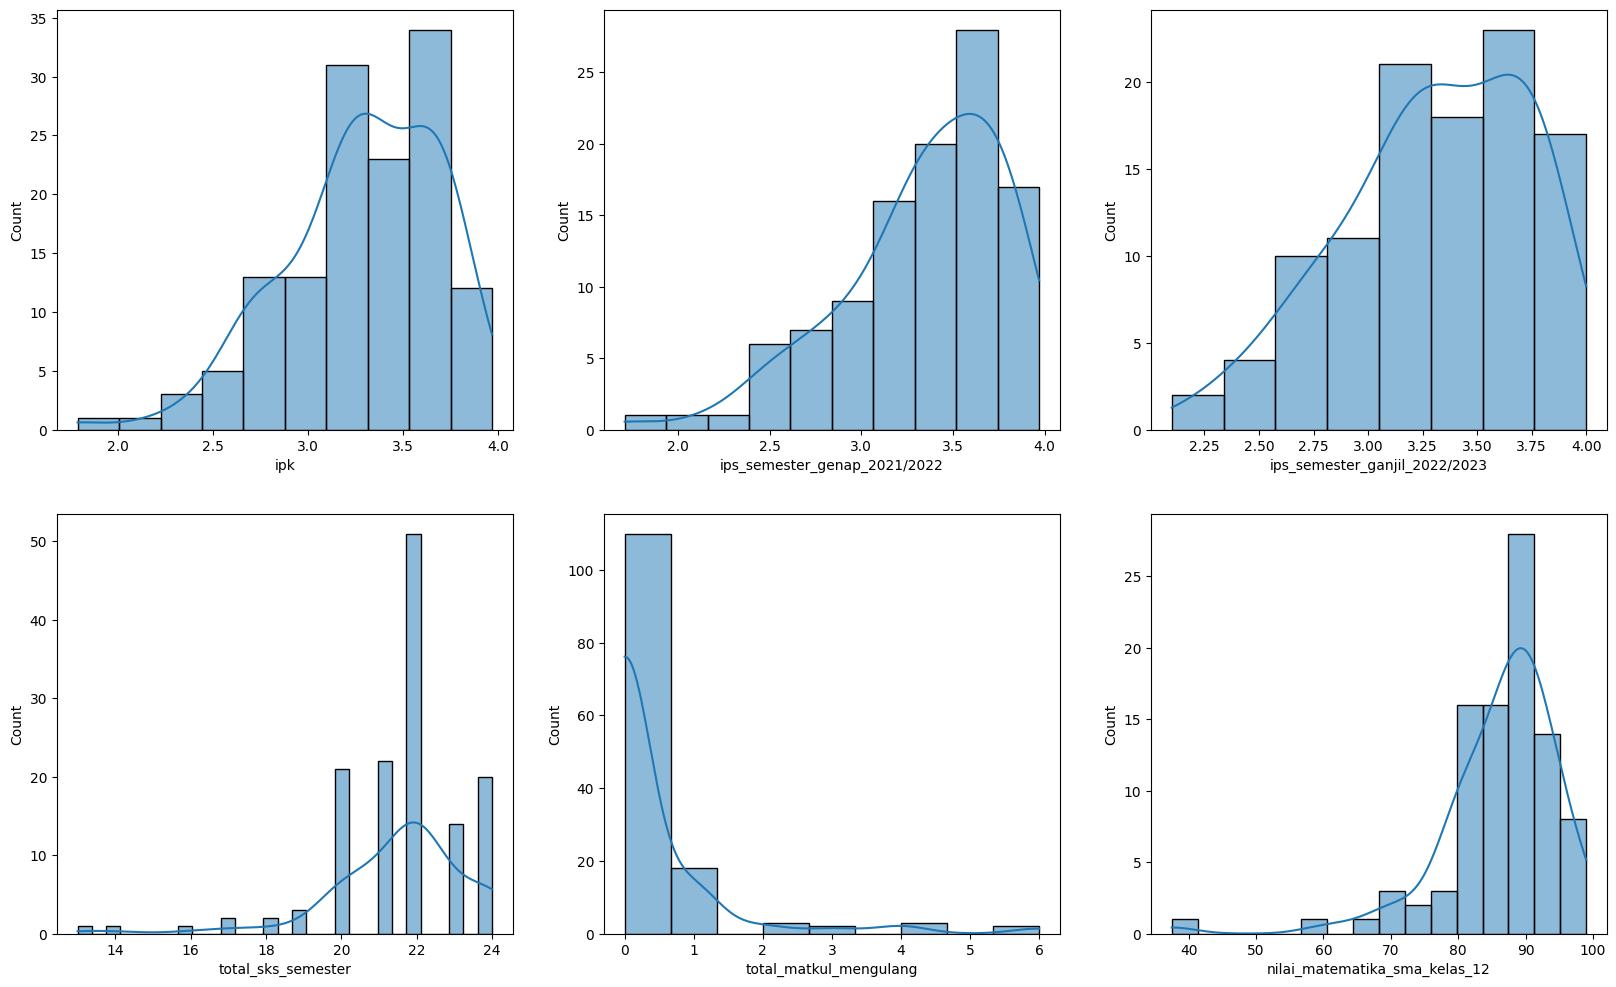

In [69]:
fig, axs = plt.subplots(2, 3, figsize=[20, 12])

for index, data in enumerate(missing_value_numerical.columns):
    sns.histplot(data=missing_value_numerical[data].astype(float), kde=True, ax=axs[index//3, index%3])

In [70]:
missing_value_numerical.median()

ipk                               3.325
ips_semester_genap_2021/2022      3.425
ips_semester_ganjil_2022/2023     3.340
total_sks_semester               22.000
total_matkul_mengulang            0.000
nilai_matematika_sma_kelas_12    89.000
dtype: float64

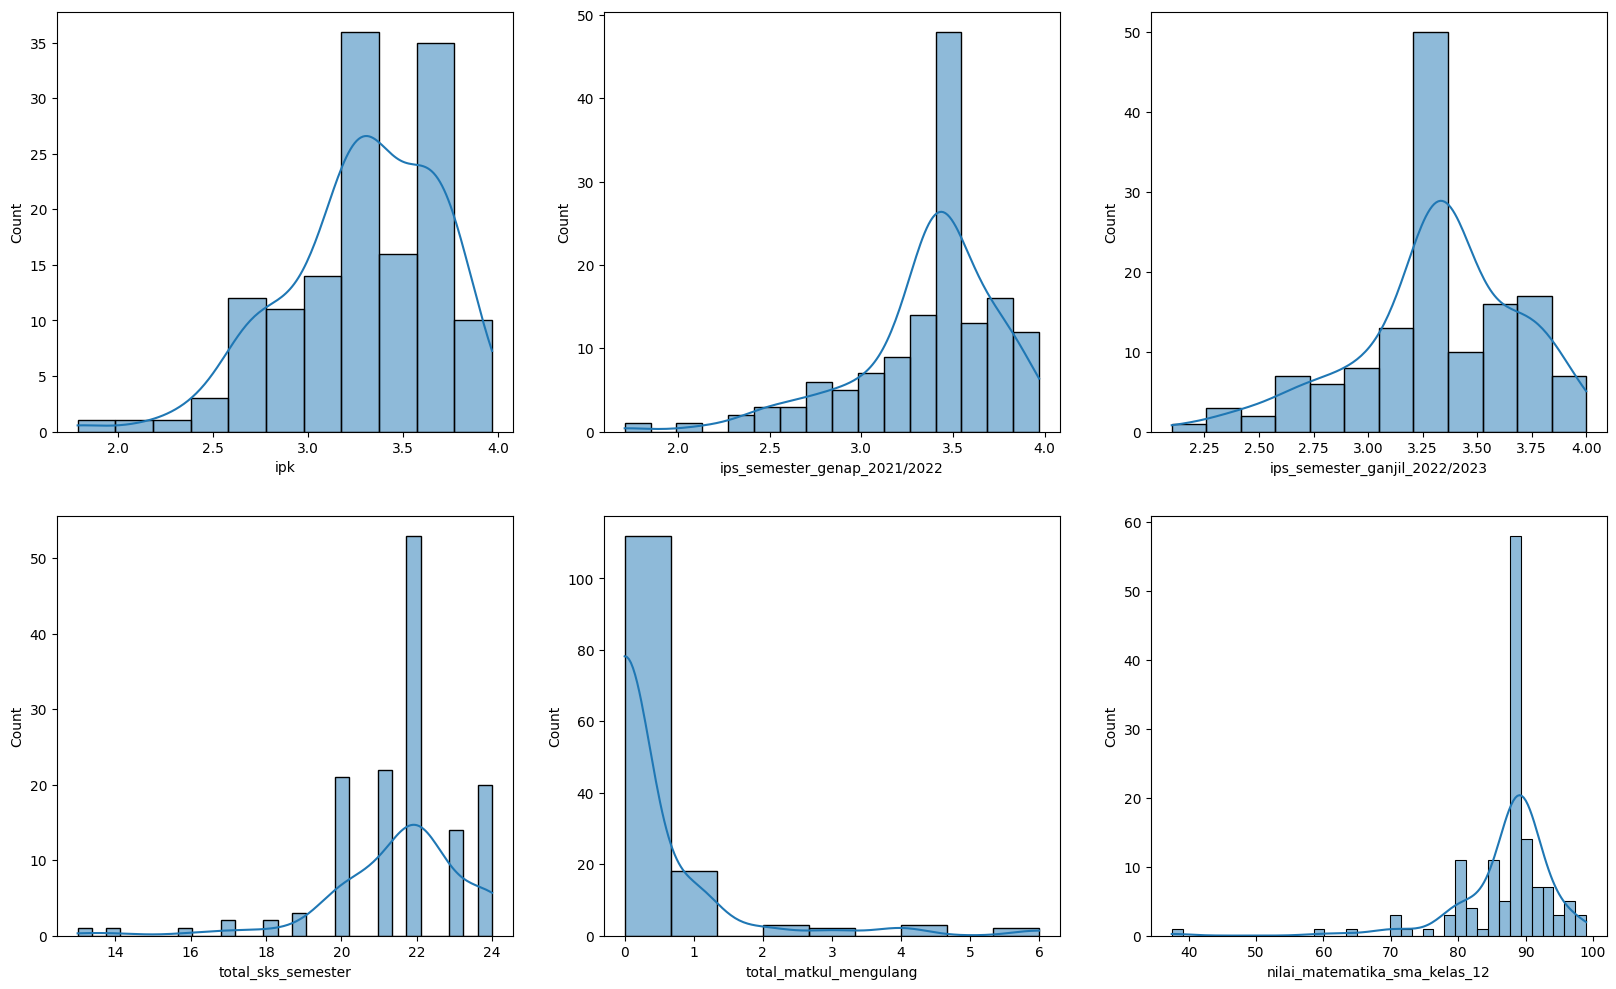

In [71]:
missing_value_numerical = missing_value_numerical.fillna(missing_value_numerical.median())

missing_value_columns[list_missing_value_numerical] = missing_value_numerical

fig, axs = plt.subplots(2, 3, figsize=[20, 12])
for index, data in enumerate(missing_value_columns[list_missing_value_numerical].columns):
    sns.histplot(data=missing_value_numerical[data].astype(float), kde=True, ax=axs[index//3, index%3])

### Categorical Data

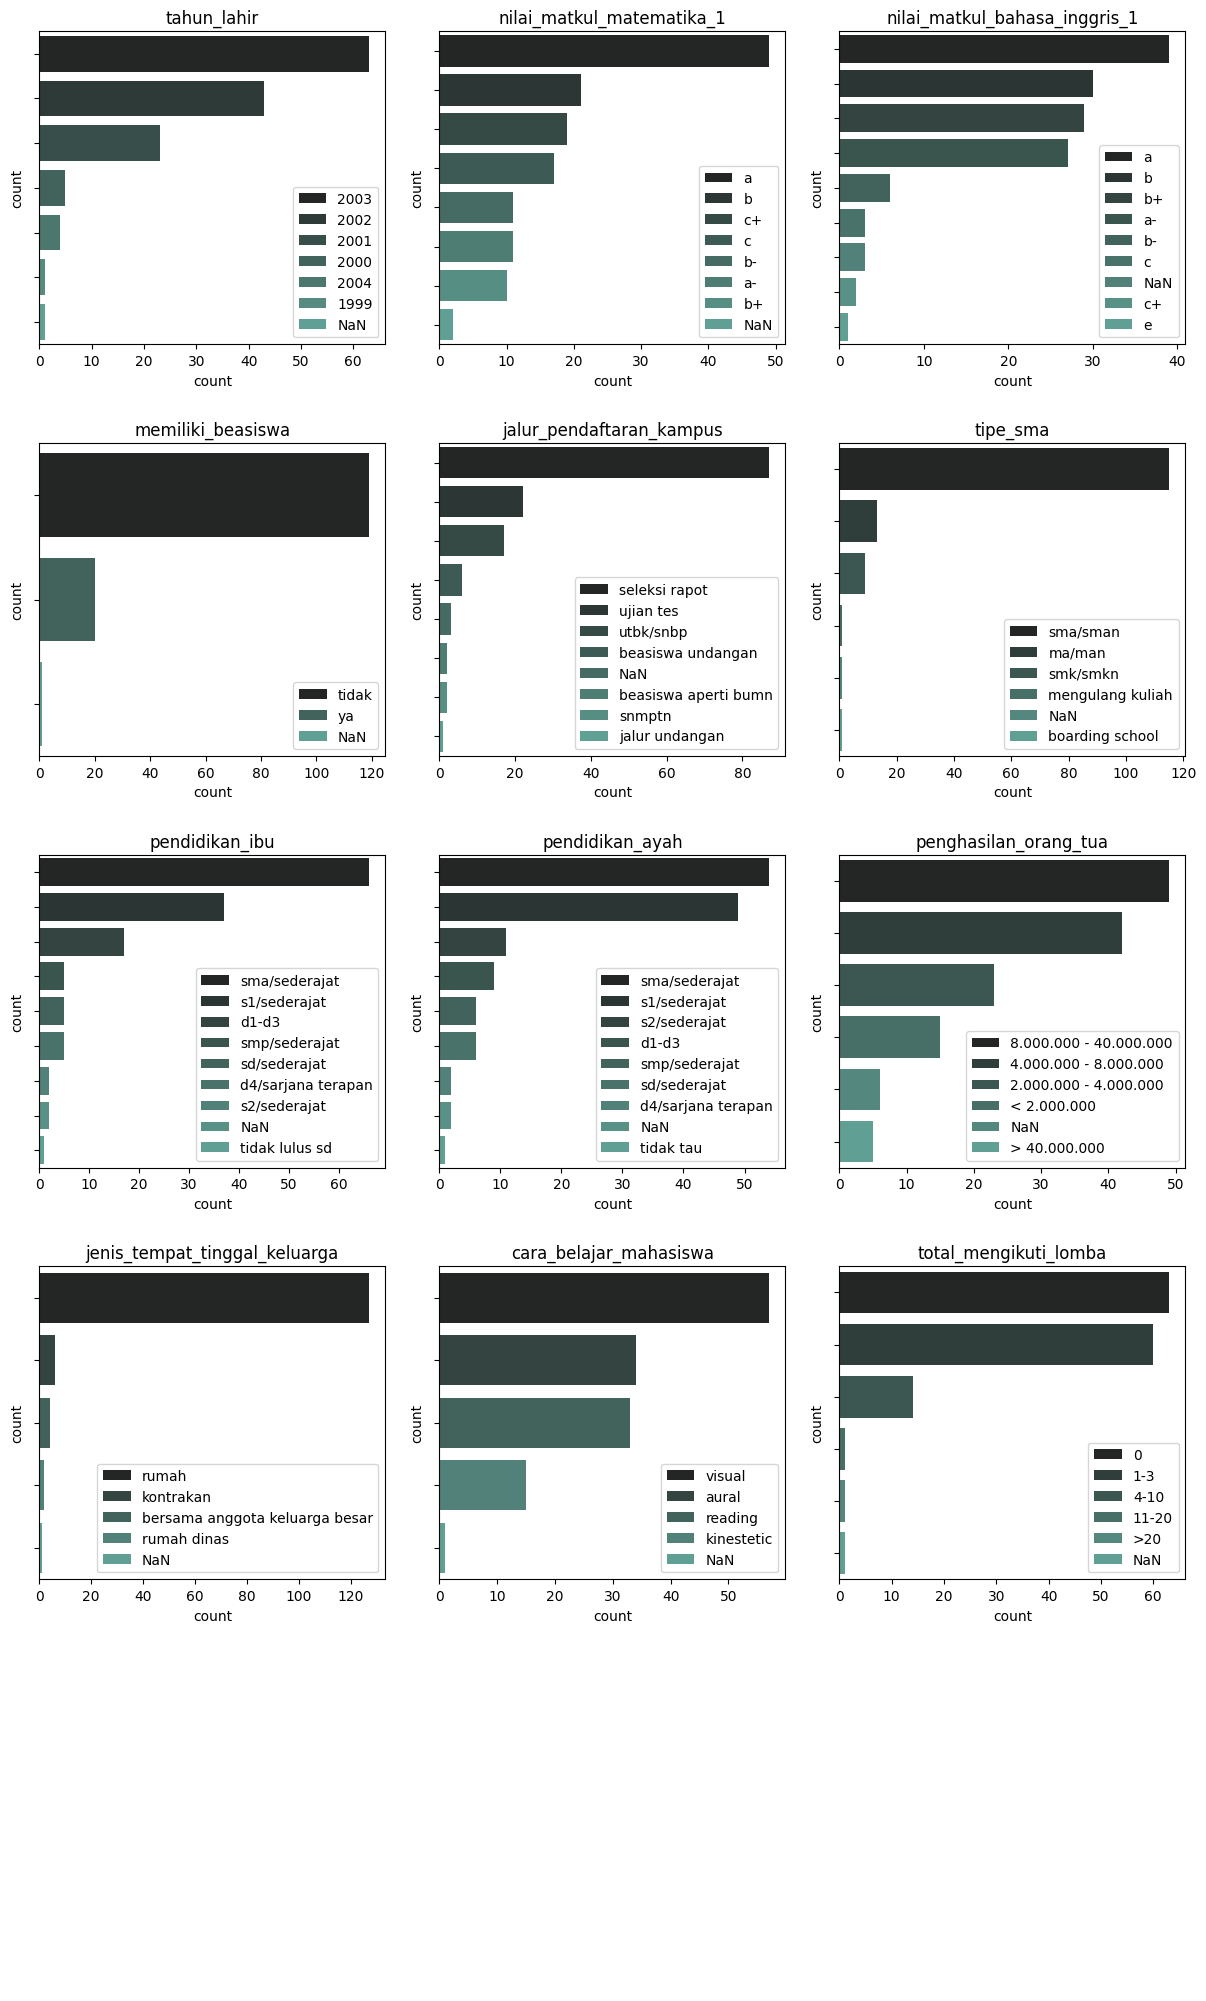

In [72]:
list_missing_value_categorical = missing_value_columns.columns[missing_value_columns.isna().any()].tolist()
list_missing_value_categorical.remove('platform_belajar_online')

missing_value_categorical = missing_value_columns[list_missing_value_categorical]

fig, axs = plt.subplots(4, 3, figsize=[12, 20])
plt.tight_layout(pad=0.4, w_pad=0.8, h_pad=5.0)

for ax, data in zip(axs.flatten(), missing_value_categorical.columns):
    sns.countplot(data=missing_value_categorical.fillna('NaN'), y=data,
                  hue=data, dodge=False,
                  hue_order=missing_value_categorical.fillna('NaN')[data].value_counts().index,
                  order=missing_value_categorical.fillna('NaN')[data].value_counts().index,
                  palette="dark:#5A9", ax=ax)
    
    ax.set_title(data)
    ax.set_ylabel('count')
    ax.set_yticklabels([])
    ax.legend(loc='lower right').set_title('')

for ax in axs.flatten()[len(missing_value_categorical.columns):]:
    ax.set_axis_off() 

In [73]:
missing_value_categorical.mode().iloc[0]

tahun_lahir                                        2003
nilai_matkul_matematika_1                             a
nilai_matkul_bahasa_inggris_1                         a
memiliki_beasiswa                                 tidak
jalur_pendaftaran_kampus                  seleksi rapot
tipe_sma                                       sma/sman
pendidikan_ibu                            sma/sederajat
pendidikan_ayah                           sma/sederajat
penghasilan_orang_tua            8.000.000 - 40.000.000
jenis_tempat_tinggal_keluarga                     rumah
cara_belajar_mahasiswa                           visual
total_mengikuti_lomba                                 0
Name: 0, dtype: object

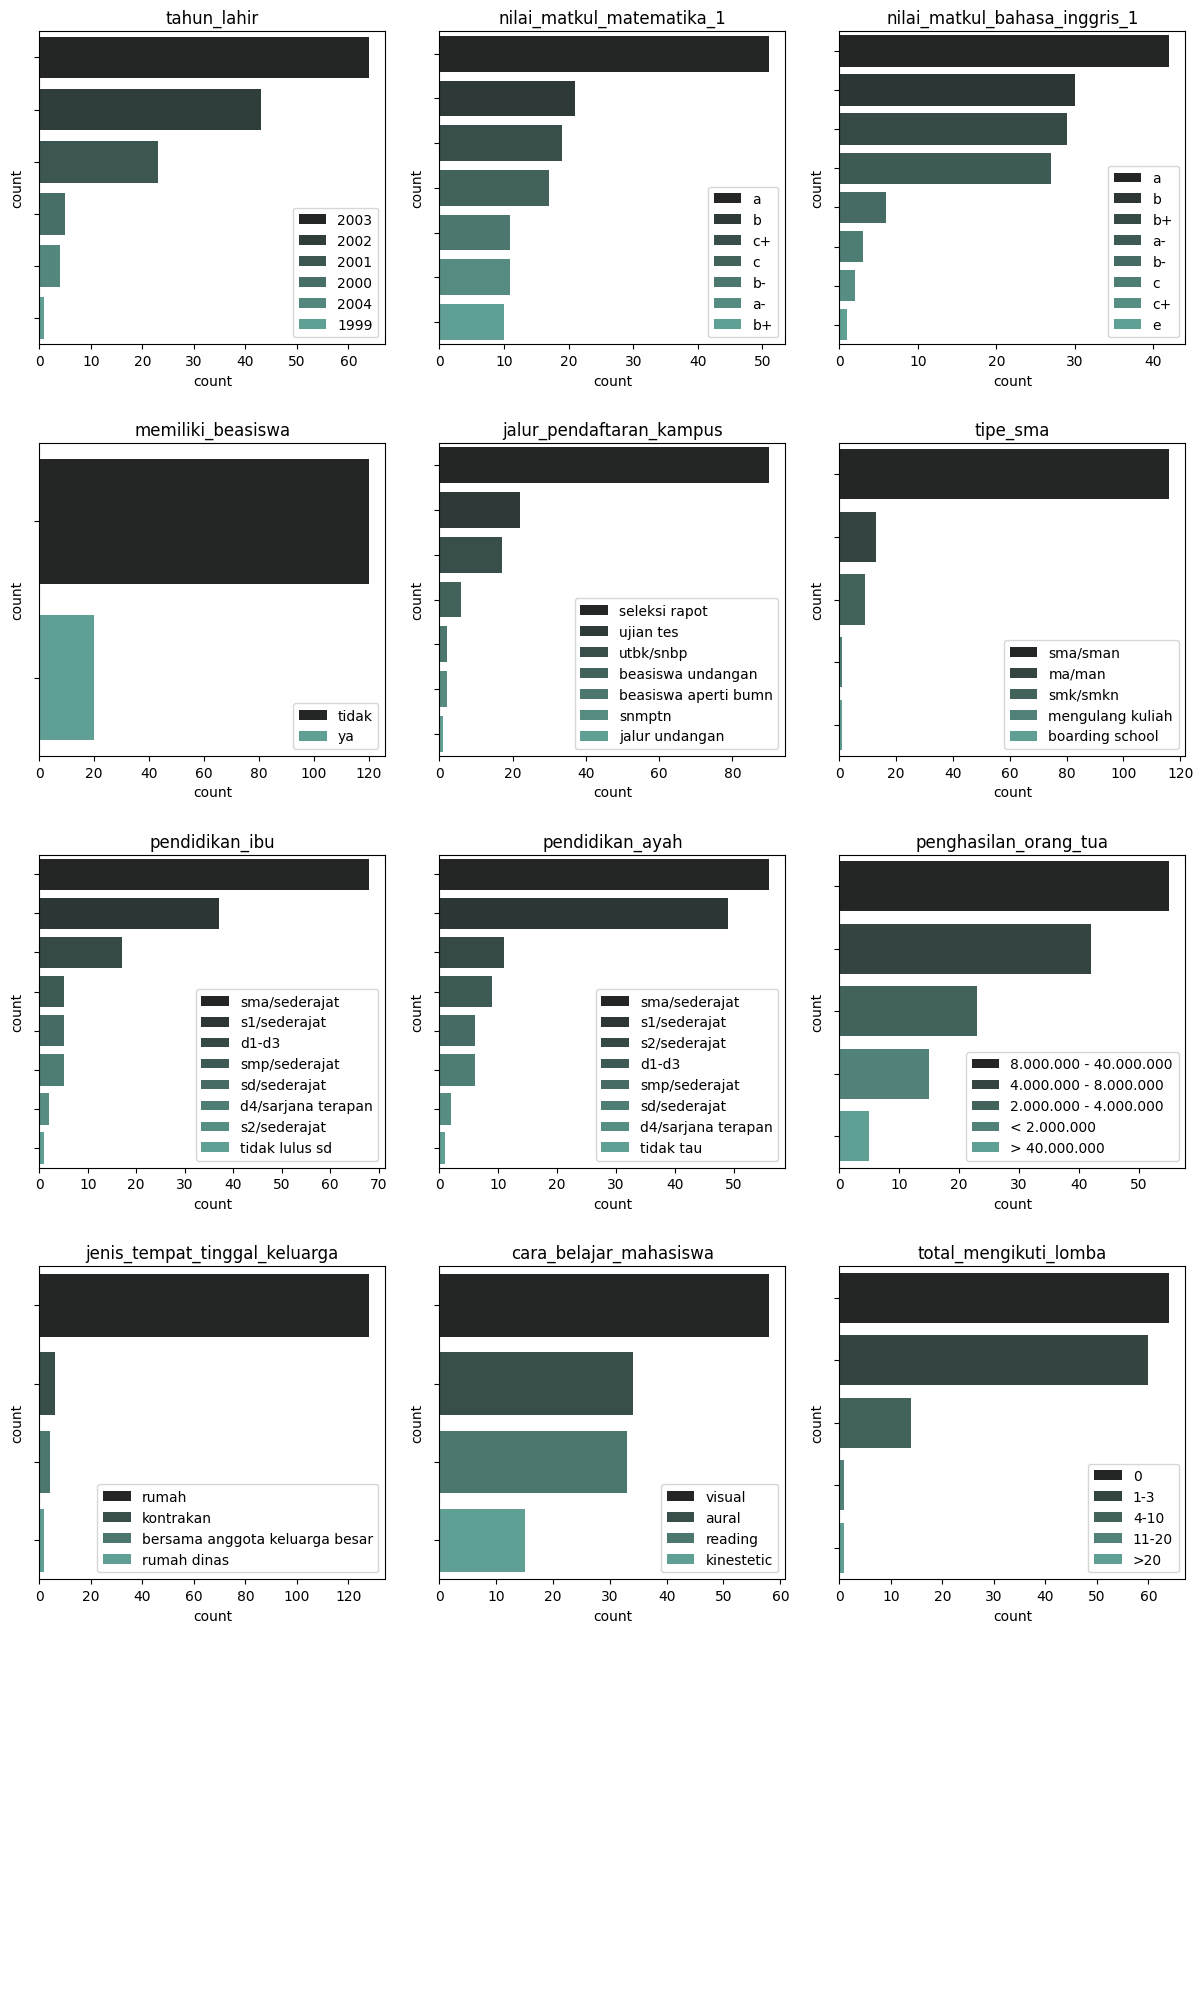

In [74]:
missing_value_categorical = missing_value_categorical.fillna(missing_value_categorical.mode().iloc[0])

missing_value_columns[list_missing_value_categorical] = missing_value_categorical

fig, axs = plt.subplots(4, 3, figsize=[12, 20])
plt.tight_layout(pad=0.4, w_pad=0.8, h_pad=5.0)

for ax, data in zip(axs.flatten(), missing_value_categorical.columns):
    sns.countplot(data=missing_value_categorical.fillna('NaN'), y=data,
                  hue=data, dodge=False,
                  hue_order=missing_value_categorical.fillna('NaN')[data].value_counts().index,
                  order=missing_value_categorical.fillna('NaN')[data].value_counts().index,
                  palette="dark:#5A9", ax=ax)
    
    ax.set_title(data)
    ax.set_ylabel('count')
    ax.set_yticklabels([])
    ax.legend(loc='lower right').set_title('')

for ax in axs.flatten()[len(missing_value_categorical.columns):]:
    ax.set_axis_off() 

### Multi Value Data

In [75]:
missing_value_multi_value = missing_value_columns['platform_belajar_online']

print(f'Column Name: {missing_value_multi_value.name} | Unique Total: {missing_value_multi_value.nunique()} | Data types: {missing_value_multi_value.dtype}')
print(f'Unique Value With Total Each Data: {missing_value_multi_value.value_counts(dropna=False)}')

Column Name: platform_belajar_online | Unique Total: 31 | Data types: object
Unique Value With Total Each Data: platform_belajar_online
tidak ada                                        91
ruangguru                                         5
ruangguru, zenius                                 4
NaN                                               3
coursera, ruangguru, zenius                       3
udemy, dicoding, sanbercode                       2
coursera                                          2
youtube                                           2
coursera, ruangguru                               2
udemy                                             2
coursera, zenius                                  2
zenius                                            2
dicoding, alterra, revou                          1
dicoding, sololearn                               1
coursera, hackerrank, udemy, sololearn            1
coursera, dicoding, sololearn, sanbercode         1
hackerrank, dicoding, sololearn 

In [76]:
missing_value_multi_value = missing_value_multi_value.fillna(missing_value_multi_value.mode().iloc[0])

missing_value_columns['platform_belajar_online'] = missing_value_multi_value

print(f'Column Name: {missing_value_multi_value.name} | Unique Total: {missing_value_multi_value.nunique()} | Data types: {missing_value_multi_value.dtype}')
print(f'Unique Value With Total Each Data: {missing_value_multi_value.value_counts(dropna=False)}')

Column Name: platform_belajar_online | Unique Total: 31 | Data types: object
Unique Value With Total Each Data: platform_belajar_online
tidak ada                                        94
ruangguru                                         5
ruangguru, zenius                                 4
coursera, ruangguru, zenius                       3
udemy, dicoding, sanbercode                       2
zenius                                            2
coursera                                          2
youtube                                           2
coursera, zenius                                  2
coursera, ruangguru                               2
udemy                                             2
coursera, udemy                                   1
dicoding, sololearn                               1
coursera, hackerrank, udemy, sololearn            1
coursera, dicoding, sololearn, sanbercode         1
hackerrank, dicoding, sololearn                   1
built with angga                

### Combine All Missing Data Treatment

In [77]:
df_cleaned[missing_value_columns.columns] = missing_value_columns

df_cleaned.isna().any()

NIM                                    False
nama_kelas                             False
jenis_kelamin                          False
tahun_lahir                            False
tempat_tinggal_kuliah                  False
provinsi_asal                          False
ipk                                    False
ips_semester_genap_2021/2022           False
ips_semester_ganjil_2022/2023          False
nilai_matkul_matematika_1              False
nilai_matkul_bahasa_inggris_1          False
total_sks_semester                     False
total_matkul_mengulang                 False
memiliki_beasiswa                      False
jalur_pendaftaran_kampus               False
tipe_sma                               False
latar_belakang_sma                     False
nilai_matematika_sma_kelas_12          False
pendidikan_ibu                         False
pendidikan_ayah                        False
jumlah_saudara                         False
role_model_keluarga                    False
penghasila

## Convert Cleaned Dataframe to CSV

For other research purpose

In [78]:
display(df_cleaned.head())

for column, value in df_cleaned.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

,NIM,nama_kelas,jenis_kelamin,tahun_lahir,tempat_tinggal_kuliah,provinsi_asal,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,nilai_matkul_matematika_1,...,suka_lomba,total_mengikuti_lomba,sosial_media,total_akses_sosial_media,genre_permainan,jenis_organisasi,jenis_ukm,estimasi_waktu_perjalanan_ke_kampus,durasi_bekerja_selama_kuliah,tipe_pekerjaan_selama_kuliah
0,103120114,sistem informasi manajemen,laki-laki,2000,bersama orang tua,dki jakarta,3.010,2.950,3.10,b,...,4.0,11-20,tiktok,3-5,"strategi, multiplayer",organisasi keahlian,olahraga,<15,20-45,part-time
1,103121024,sistem informasi manajemen,laki-laki,2001,kos,jawa tengah,3.250,3.190,3.31,b,...,2.0,0,instagram,3-5,strategi,tidak mengikuti organisasi,tidak mengikuti kegiatan ukm,15-30,20-45,berdagang/berjualan
2,103121035,sistem informasi manajemen,laki-laki,2003,bersama orang tua,dki jakarta,3.290,3.330,3.08,a,...,2.0,0,instagram,1-3,"multiplayer, strategi, aksi, shooting",himpunan mahasiswa,tidak mengikuti kegiatan ukm,60-120,<10,freelance
3,103121017,sistem informasi manajemen,laki-laki,2003,bersama orang tua,dki jakarta,3.330,3.560,3.46,b,...,2.0,0,"instagram, twitter, tiktok",5-10,multiplayer,himpunan mahasiswa,olahraga,30-60,0,tidak bekerja
4,103121012,sistem informasi manajemen,laki-laki,2003,kos,sumatera utara,3.325,3.425,3.34,c+,...,2.0,0,"instagram, facebook, tiktok",1-3,"aksi, petualangan, strategi, teka-teki, olahraga",organisasi keagamaan,keagamaan,<15,<10,part-time


Column Name: NIM | Unique Total: 140 | Data types: int64
Unique Value: [103120114 103121024 103121035 103121017 103121012 103120108 103121057
 103121014 103121077 103119015 103121062 103121048 103118080 103121064
 103121041 103121026 103121021 103121037 103121044 103120037 103121020
 103121023 103121033 103121046 103121001 103121069 103121081 103121051
 103121049 103121029 103121063 103121011 103121065 103119053 103121027
 103121052 103121036 103121059 103121056 103121070 103121094 103121028
 103121054 103121003 103121084 103121083 103121071 103121058 103121095
 103121031 103121055 103121053 103121043 103121080 103121006 101121014
 101121004 101121003 101121026 101121044 101121047 101121031 101121011
 101121049 101121033 101121032 101121021 101121046 101121029 101121043
 101121025 101121030 101121042 101121037 101121034 101121012 101121022
 101121007 101121027 101121009 101121018 101121016 101121039 101121035
 101121028 101121002 101121019 101121001 101121008 101121048 101121024
 10112

In [79]:
df_cleaned.to_csv('data_kuisioner_mahasiswa_cleaned.csv', index=False)

# Data Transformation

In [80]:
df_transformed = df_cleaned.drop(columns='NIM')

In [81]:
for column, value in df_transformed.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan']

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004']

Column Name: tempat_tinggal_kuliah | Unique Total: 6 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'bersama anggota keluarga besar' 'apartemen']

Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' 'sulawesi utara'
 'maluku utara

In [82]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   nama_kelas                           140 non-null    object 
 1   jenis_kelamin                        140 non-null    object 
 2   tahun_lahir                          140 non-null    object 
 3   tempat_tinggal_kuliah                140 non-null    object 
 4   provinsi_asal                        140 non-null    object 
 5   ipk                                  140 non-null    float32
 6   ips_semester_genap_2021/2022         140 non-null    float32
 7   ips_semester_ganjil_2022/2023        140 non-null    float32
 8   nilai_matkul_matematika_1            140 non-null    object 
 9   nilai_matkul_bahasa_inggris_1        140 non-null    object 
 10  total_sks_semester                   140 non-null    float64
 11  total_matkul_mengulang          

## Data Normalization

In [83]:
list_numeric_data = df_transformed.select_dtypes('number').columns.tolist()
columns_numeric_data = df_transformed[list_numeric_data].copy()
columns_numeric_data.head()

,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,total_sks_semester,total_matkul_mengulang,nilai_matematika_sma_kelas_12
0,3.010,2.950,3.10,22.0,1.0,70.0
1,3.250,3.190,3.31,22.0,0.0,89.0
2,3.290,3.330,3.08,22.0,0.0,89.0
3,3.330,3.560,3.46,22.0,1.0,82.0
4,3.325,3.425,3.34,22.0,0.0,89.0


In [84]:
scaler = MinMaxScaler()
columns_numeric_data[list_numeric_data] = scaler.fit_transform(columns_numeric_data[list_numeric_data])

df_transformed[list_numeric_data] = columns_numeric_data

df_transformed[list_numeric_data].head()

,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,total_sks_semester,total_matkul_mengulang,nilai_matematika_sma_kelas_12
0,0.559633,0.548673,0.526316,0.818182,0.166667,0.528455
1,0.669725,0.654867,0.636842,0.818182,0.000000,0.837398
2,0.688073,0.716814,0.515789,0.818182,0.000000,0.837398
3,0.706422,0.818584,0.715790,0.818182,0.166667,0.723577
4,0.704128,0.758850,0.652632,0.818182,0.000000,0.837398


## Data Encoding

Reference:
<ol>
    
  <li>For Ordinal Encoding vs One Hot Encoding</li>
    <a href="https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor">https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor</a><br>
    <a href="https://medium.com/@milanbhadja7932/one-hot-encoding-and-label-encoding-3a329481984e">https://medium.com/@milanbhadja7932/one-hot-encoding-and-label-encoding-3a329481984e</a><br>
    <a href="https://www.formpl.us/blog/nominal-ordinal-data">https://www.formpl.us/blog/nominal-ordinal-data</a><br>
    
  <li>For Multi Data Column</li>
    <a href="https://stackoverflow.com/questions/37646473/how-could-i-do-one-hot-encoding-with-multiple-values-in-one-cell">https://stackoverflow.com/questions/37646473/how-could-i-do-one-hot-encoding-with-multiple-values-in-one-cell</a><br>
    <a href="https://stats.stackexchange.com/questions/467633/what-exactly-is-multi-hot-encoding-and-how-is-it-different-from-one-hot">https://stats.stackexchange.com/questions/467633/what-exactly-is-multi-hot-encoding-and-how-is-it-different-from-one-hot</a><br>
    <a href="https://stackoverflow.com/questions/67108935/dataframe-with-multiple-values-in-each-column-how-to-one-hot-encode-them-under">https://stackoverflow.com/questions/67108935/dataframe-with-multiple-values-in-each-column-how-to-one-hot-encode-them-under</a><br>
    <a href="https://stats.stackexchange.com/questions/596523/encode-multiple-values-of-an-attributes-in-pandas">https://stats.stackexchange.com/questions/596523/encode-multiple-values-of-an-attributes-in-pandas</a><br>
    <a href="https://stackoverflow.com/questions/60153981/scikit-learn-one-hot-encoding-certain-columns-of-a-pandas-dataframe">https://stackoverflow.com/questions/60153981/scikit-learn-one-hot-encoding-certain-columns-of-a-pandas-dataframe</a><br>
</ol>


In [85]:
total_column_before_encoding = len(df_transformed.columns)
print(f'Total Column Before Encoding: {total_column_before_encoding}')
print('='*100)
print()

for column, value in df_transformed.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Total Column Before Encoding: 38

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan']

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004']

Column Name: tempat_tinggal_kuliah | Unique Total: 6 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'bersama anggota keluarga besar' 'apartemen']

Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggar

### Ordinal Encoding for Ordinal and Interval Data

In [86]:
list_ordinal_data = [
    'jenis_kelamin',
    'tahun_lahir',
    'nilai_matkul_matematika_1',
    'nilai_matkul_bahasa_inggris_1',
    'memiliki_beasiswa',
    'tipe_sma',
    'latar_belakang_sma',
    'pendidikan_ibu',
    'pendidikan_ayah',
    'jumlah_saudara',
    'penghasilan_orang_tua',
    'rating_kesan_mata_kuliah',
    'waktu_khusus_belajar',
    'akses_pembelajaran',
    'suka_lomba',
    'total_mengikuti_lomba',
    'total_akses_sosial_media',
    'estimasi_waktu_perjalanan_ke_kampus',
    'durasi_bekerja_selama_kuliah',
]

columns_ordinal_data = df_transformed[list_ordinal_data].copy()
for column, value in columns_ordinal_data.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan']

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004']

Column Name: nilai_matkul_matematika_1 | Unique Total: 7 | Data types: object
Unique Value: ['b' 'a' 'c+' 'b-' 'a-' 'b+' 'c']

Column Name: nilai_matkul_bahasa_inggris_1 | Unique Total: 8 | Data types: object
Unique Value: ['a-' 'b' 'a' 'b-' 'b+' 'c+' 'c' 'e']

Column Name: memiliki_beasiswa | Unique Total: 2 | Data types: object
Unique Value: ['tidak' 'ya']

Column Name: tipe_sma | Unique Total: 5 | Data types: object
Unique Value: ['sma/sman' 'mengulang kuliah' 'smk/smkn' 'ma/man' 'boarding school']

Column Name: latar_belakang_sma | Unique Total: 2 | Data types: object
Unique Value: ['negeri' 'swasta']

Column Name: pendidikan_ibu | Unique Total: 8 | Data types: object
Unique Value: ['sma/sederajat' 's1/sederajat' 'd1-d3' 'smp/sederajat' 'sd/sederajat'
 's2

In [87]:
oe = OrdinalEncoder()

columns_ordinal_data[list_ordinal_data] = oe.fit_transform(columns_ordinal_data[list_ordinal_data])
columns_ordinal_data

,jenis_kelamin,tahun_lahir,nilai_matkul_matematika_1,nilai_matkul_bahasa_inggris_1,memiliki_beasiswa,tipe_sma,latar_belakang_sma,pendidikan_ibu,pendidikan_ayah,jumlah_saudara,penghasilan_orang_tua,rating_kesan_mata_kuliah,waktu_khusus_belajar,akses_pembelajaran,suka_lomba,total_mengikuti_lomba,total_akses_sosial_media,estimasi_waktu_perjalanan_ke_kampus,durasi_bekerja_selama_kuliah
0,0.0,1.0,2.0,1.0,0.0,3.0,0.0,5.0,5.0,1.0,4.0,3.0,1.0,0.0,3.0,2.0,2.0,3.0,2.0
1,0.0,2.0,2.0,2.0,0.0,3.0,0.0,5.0,5.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0
2,0.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,2.0,3.0
3,0.0,4.0,2.0,0.0,0.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0
4,0.0,4.0,6.0,4.0,0.0,2.0,1.0,0.0,5.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.0,2.0,5.0,2.0,0.0,3.0,0.0,2.0,5.0,1.0,2.0,3.0,0.0,0.0,4.0,3.0,1.0,0.0,1.0
136,0.0,3.0,6.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0,3.0
137,0.0,2.0,5.0,4.0,0.0,4.0,0.0,5.0,5.0,2.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
138,1.0,3.0,6.0,3.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,2.0,1.0,3.0,3.0,0.0


In [88]:
df_transformed[list_ordinal_data] = columns_ordinal_data

### One Hot Encoding for Nominal Data

In [89]:
list_nominal_data = [
    'nama_kelas',
    'tempat_tinggal_kuliah',
    'provinsi_asal',
    'jalur_pendaftaran_kampus',
    'jenis_tempat_tinggal_keluarga',
    'cara_belajar_mahasiswa'
]

for column, value in df_transformed[list_nominal_data].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']

Column Name: tempat_tinggal_kuliah | Unique Total: 6 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'bersama anggota keluarga besar' 'apartemen']

Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' 'sulawesi utara'
 'maluku utara' 'papua barat daya' 'bali' 'jambi' 'sumatera barat'
 'nusa tenggara barat' 'bangka belitung']

Column Name: jalur_pendaftaran_kampus | Unique Total: 7 | Data types: object
Unique Value: ['seleksi rapot' 'beasiswa aperti bumn' 'uj

In [90]:
# ohe = OneHotEncoder()

# columns_nominal_data = df_transformed[list_nominal_data].copy()
# columns_nominal_data = pd.get_dummies(columns_nominal_data,
#                                       prefix=columns_nominal_data.columns.tolist(),
#                                       dtype=float,
#                                       drop_first=False)
# columns_nominal_data

In [91]:
df_transformed = pd.get_dummies(df_transformed,
                                prefix=df_transformed[list_nominal_data].columns.tolist(),
                                columns=list_nominal_data,
                                dtype=float,
                                drop_first=False)

In [92]:
temp1 = pd.DataFrame()
for column in list_nominal_data:
    temp2 = [col for col in df_transformed if col.startswith(column)]
    temp2 = df_transformed[temp2].copy()
    
    temp1 = pd.concat([temp1, temp2], axis=1)

temp1

,nama_kelas_praktikum pembelajaran mesin prodi ilmu komputer,nama_kelas_sains data dan pembelajaran mesin dalam geofisika,nama_kelas_sistem informasi manajemen,tempat_tinggal_kuliah_apartemen,tempat_tinggal_kuliah_asrama,tempat_tinggal_kuliah_bersama anggota keluarga besar,tempat_tinggal_kuliah_bersama orang tua,tempat_tinggal_kuliah_kontrakan,tempat_tinggal_kuliah_kos,provinsi_asal_bali,...,jalur_pendaftaran_kampus_ujian tes,jalur_pendaftaran_kampus_utbk/snbp,jenis_tempat_tinggal_keluarga_bersama anggota keluarga besar,jenis_tempat_tinggal_keluarga_kontrakan,jenis_tempat_tinggal_keluarga_rumah,jenis_tempat_tinggal_keluarga_rumah dinas,cara_belajar_mahasiswa_aural,cara_belajar_mahasiswa_kinestetic,cara_belajar_mahasiswa_reading,cara_belajar_mahasiswa_visual
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
137,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [93]:
print(f'Total Column Before Encoding: {total_column_before_encoding}')

total_column_after_OHE = len(df_transformed.columns)
print(f'Total Column After OHE for Nominal Data: {total_column_after_OHE}')

Total Column Before Encoding: 38
Total Column After OHE for Nominal Data: 80


### Multi Label Binarizer for Multi Value Row

In [94]:
list_multi_value = [
    'role_model_keluarga',
    'platform_belajar_online',
    'sosial_media',
    'genre_permainan',
    'jenis_organisasi',
    'jenis_ukm',
    'tipe_pekerjaan_selama_kuliah'
]

df_encode = df_transformed.copy()

In [95]:
for column, value in df_encode[list_multi_value].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)
    print()

Column Name: role_model_keluarga | Unique Total: 8 | Data types: object
Unique Value: ['bapak' 'kakek' 'kakak' 'tidak ada / rahasia' 'ibu' 'kakak, ibu'
 'bapak, ibu' 'paman']

Column Name: platform_belajar_online | Unique Total: 31 | Data types: object
Unique Value: ['tidak ada' 'zenius' 'coursera, zenius' 'udemy'
 'coursera, ruangguru, zenius' 'coursera, ruangguru' 'ruangguru, zenius'
 'ruangguru' 'coursera, udemy' 'ruangguru, zenius, quipper' 'coursera'
 'english academy' 'revou' 'dicoding'
 'coursera, udemy, sololearn, ruangguru, zenius' 'youtube'
 'udemy, myskill' 'hackerrank, sanbercode' 'coursera, udemy, dicoding'
 'coursera, dicoding' 'dicoding, alterra, revou'
 'udemy, dicoding, sanbercode' 'coursera, dicoding, sanbercode, ruangguru'
 'sanbercode' 'udemy, sololearn, sanbercode' 'built with angga'
 'hackerrank, dicoding, sololearn'
 'coursera, dicoding, sololearn, sanbercode'
 'coursera, hackerrank, udemy, sololearn' 'dicoding, sololearn' 'myskill']

Column Name: sosial_media | 

In [96]:
df_encode[list_multi_value] = df_encode[list_multi_value].applymap(lambda x: x.split(', '))
df_encode[list_multi_value]

,role_model_keluarga,platform_belajar_online,sosial_media,genre_permainan,jenis_organisasi,jenis_ukm,tipe_pekerjaan_selama_kuliah
0,[bapak],[tidak ada],[tiktok],"[strategi, multiplayer]",[organisasi keahlian],[olahraga],[part-time]
1,[kakek],[tidak ada],[instagram],[strategi],[tidak mengikuti organisasi],[tidak mengikuti kegiatan ukm],[berdagang/berjualan]
2,[kakak],[tidak ada],[instagram],"[multiplayer, strategi, aksi, shooting]",[himpunan mahasiswa],[tidak mengikuti kegiatan ukm],[freelance]
3,[bapak],[tidak ada],"[instagram, twitter, tiktok]",[multiplayer],[himpunan mahasiswa],[olahraga],[tidak bekerja]
4,[bapak],[tidak ada],"[instagram, facebook, tiktok]","[aksi, petualangan, strategi, teka-teki, olahr...",[organisasi keagamaan],[keagamaan],[part-time]
...,...,...,...,...,...,...,...
135,[tidak ada / rahasia],"[coursera, dicoding, sololearn, sanbercode]","[instagram, facebook]","[aksi, strategi, multiplayer]",[tidak mengikuti organisasi],[tidak mengikuti kegiatan ukm],[freelance]
136,[bapak],"[coursera, hackerrank, udemy, sololearn]","[instagram, twitter, tiktok]","[aksi, strategi, multiplayer]","[himpunan mahasiswa, organisasi keagamaan, org...",[keagamaan],[magang/intern]
137,[ibu],"[dicoding, sololearn]","[instagram, facebook, twitter, tiktok]",[shooting],[himpunan mahasiswa],[tidak mengikuti kegiatan ukm],[tidak bekerja]
138,[ibu],[myskill],"[instagram, tiktok]","[strategi, teka-teki]",[himpunan mahasiswa],[tidak mengikuti kegiatan ukm],[tidak bekerja]


In [97]:
mlb = MultiLabelBinarizer()
for column, data in df_encode[list_multi_value].items():
    mlb_multi_value = mlb.fit_transform(data)
    columns_loc = df_encode.columns.get_loc(column)
#     print(f'{column}_{mlb.classes_}')
    print(f'column index: {columns_loc} | total classes: {len(mlb.classes_)}')
#     print(mlb_multi_value)
    
    df_encode = df_encode.drop(columns=column)
    for index_classes, name_classes in enumerate(mlb.classes_):
#         print(f'class index: {columns_loc+index_classes} | class name: {name_classes}')
#         print(f'data:\n{mlb_multi_value[:, index_classes]}')
        df_encode.insert(columns_loc,
                         f'{column}_{name_classes}',
                         mlb_multi_value[:, index_classes])        
    print('='*100)
    print()

column index: 16 | total classes: 6

column index: 25 | total classes: 16

column index: 44 | total classes: 7

column index: 52 | total classes: 8

column index: 60 | total classes: 10

column index: 70 | total classes: 9

column index: 81 | total classes: 8



In [98]:
# ohe = OneHotEncoder()

# temp = df_transformed.copy()
# temp = temp[list_multi_value].applymap(lambda x: x.split(', '))
# temp = ohe.fit_transform(temp[list_multi_value])
# temp

In [99]:
df_transformed = df_encode.copy()

print(f'Total Column Before Encoding: {total_column_before_encoding}')

total_column_after_MLB = len(df_transformed.columns)
print(f'Total Column After OHE for Nominal Data: {total_column_after_OHE} (total increase of {total_column_after_OHE-total_column_before_encoding} columns)')
print(f'Total Column After OHE for Nominal Data + MLB for Multi Value Data: {total_column_after_MLB} (total increase of {total_column_after_MLB-total_column_after_OHE} columns)')

Total Column Before Encoding: 38
Total Column After OHE for Nominal Data: 80 (total increase of 42 columns)
Total Column After OHE for Nominal Data + MLB for Multi Value Data: 137 (total increase of 57 columns)


# Exploratory Data Analysis

## Data Information

In [100]:
df_transformed.head()

,jenis_kelamin,tahun_lahir,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,nilai_matkul_matematika_1,nilai_matkul_bahasa_inggris_1,total_sks_semester,total_matkul_mengulang,memiliki_beasiswa,...,jalur_pendaftaran_kampus_ujian tes,jalur_pendaftaran_kampus_utbk/snbp,jenis_tempat_tinggal_keluarga_bersama anggota keluarga besar,jenis_tempat_tinggal_keluarga_kontrakan,jenis_tempat_tinggal_keluarga_rumah,jenis_tempat_tinggal_keluarga_rumah dinas,cara_belajar_mahasiswa_aural,cara_belajar_mahasiswa_kinestetic,cara_belajar_mahasiswa_reading,cara_belajar_mahasiswa_visual
0,0.0,1.0,0.559633,0.548673,0.526316,2.0,1.0,0.818182,0.166667,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,2.0,0.669725,0.654867,0.636842,2.0,2.0,0.818182,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,4.0,0.688073,0.716814,0.515789,0.0,1.0,0.818182,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,4.0,0.706422,0.818584,0.715790,2.0,0.0,0.818182,0.166667,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,4.0,0.704128,0.758850,0.652632,6.0,4.0,0.818182,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [101]:
df_transformed.columns.tolist()

['jenis_kelamin',
 'tahun_lahir',
 'ipk',
 'ips_semester_genap_2021/2022',
 'ips_semester_ganjil_2022/2023',
 'nilai_matkul_matematika_1',
 'nilai_matkul_bahasa_inggris_1',
 'total_sks_semester',
 'total_matkul_mengulang',
 'memiliki_beasiswa',
 'tipe_sma',
 'latar_belakang_sma',
 'nilai_matematika_sma_kelas_12',
 'pendidikan_ibu',
 'pendidikan_ayah',
 'jumlah_saudara',
 'role_model_keluarga_tidak ada / rahasia',
 'role_model_keluarga_paman',
 'role_model_keluarga_kakek',
 'role_model_keluarga_kakak',
 'role_model_keluarga_ibu',
 'role_model_keluarga_bapak',
 'penghasilan_orang_tua',
 'rating_kesan_mata_kuliah',
 'waktu_khusus_belajar',
 'platform_belajar_online_zenius',
 'platform_belajar_online_youtube',
 'platform_belajar_online_udemy',
 'platform_belajar_online_tidak ada',
 'platform_belajar_online_sololearn',
 'platform_belajar_online_sanbercode',
 'platform_belajar_online_ruangguru',
 'platform_belajar_online_revou',
 'platform_belajar_online_quipper',
 'platform_belajar_online_m

In [102]:
df_transformed.describe()

,jenis_kelamin,tahun_lahir,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,nilai_matkul_matematika_1,nilai_matkul_bahasa_inggris_1,total_sks_semester,total_matkul_mengulang,memiliki_beasiswa,...,jalur_pendaftaran_kampus_ujian tes,jalur_pendaftaran_kampus_utbk/snbp,jenis_tempat_tinggal_keluarga_bersama anggota keluarga besar,jenis_tempat_tinggal_keluarga_kontrakan,jenis_tempat_tinggal_keluarga_rumah,jenis_tempat_tinggal_keluarga_rumah dinas,cara_belajar_mahasiswa_aural,cara_belajar_mahasiswa_kinestetic,cara_belajar_mahasiswa_reading,cara_belajar_mahasiswa_visual
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.464286,3.257143,0.688860,0.731827,0.639586,2.328571,1.657143,0.779221,0.064286,0.142857,...,0.157143,0.121429,0.028571,0.042857,0.914286,0.014286,0.242857,0.107143,0.235714,0.414286
std,0.500514,0.939703,0.185159,0.173944,0.197248,2.261479,1.506683,0.166147,0.171496,0.351184,...,0.365242,0.327797,0.167197,0.203262,0.280947,0.119092,0.430349,0.310405,0.425968,0.494367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.595183,0.680310,0.555263,0.000000,0.000000,0.727273,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.704128,0.758850,0.652632,2.000000,2.000000,0.818182,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,0.838303,0.842920,0.778947,5.000000,3.000000,0.818182,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,5.000000,1.000000,1.000000,1.000000,6.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Distribution

### Numerical Data

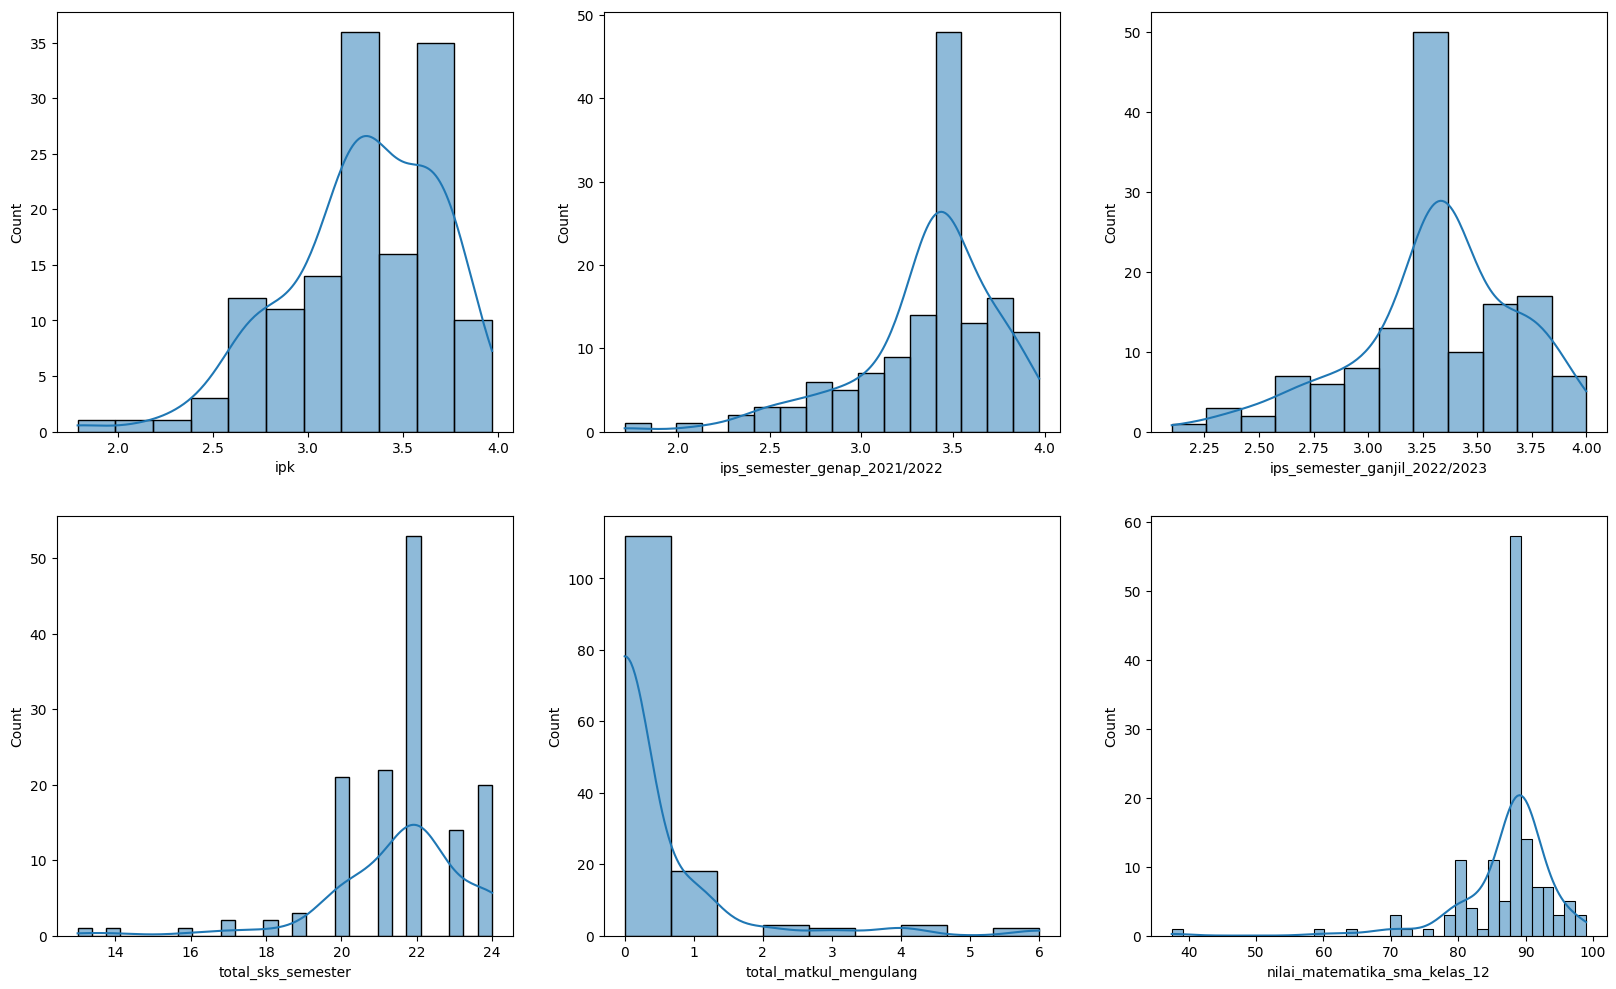

In [103]:
fig, axs = plt.subplots(2, 3, figsize=[20, 12])
for index, data in enumerate(df_transformed[list_numeric_data].columns):
    sns.histplot(data=missing_value_numerical[data].astype(float), kde=True, ax=axs[index//3, index%3])

### Ordinal and Interval Data

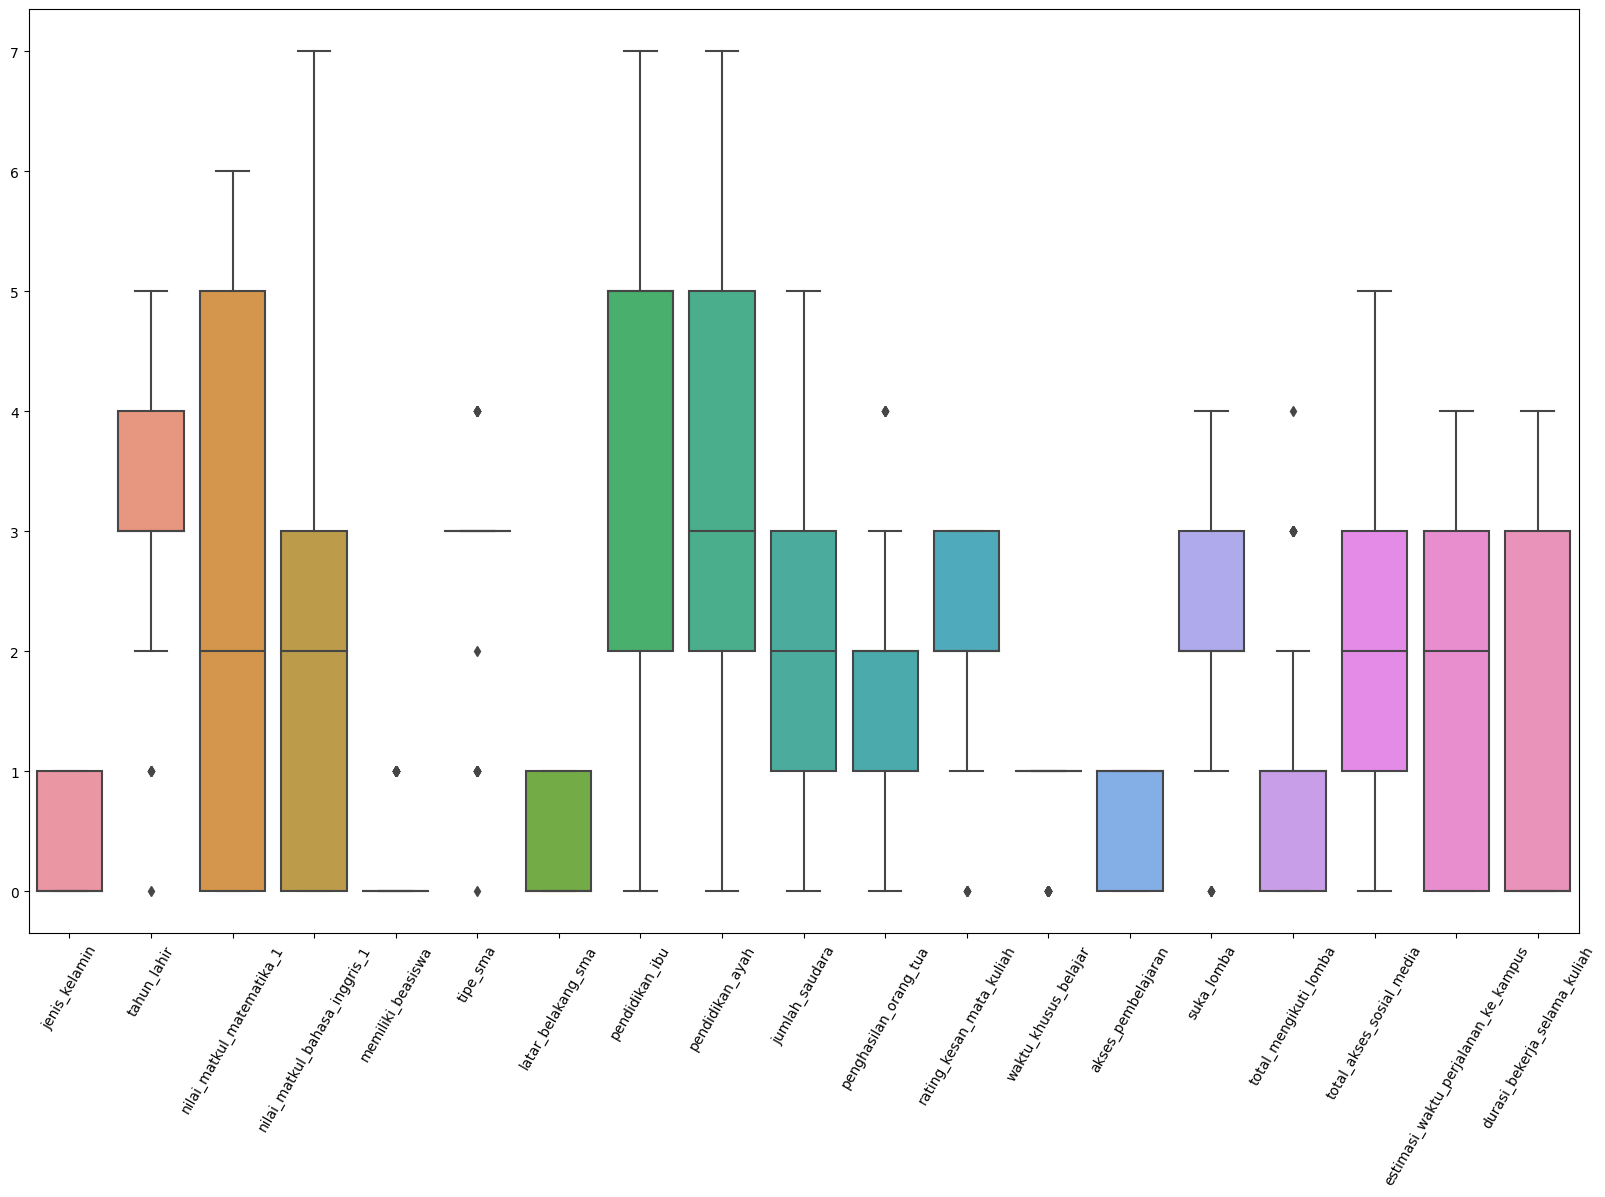

In [110]:
plt.figure(figsize=[20, 12])

sns.boxplot(data=df_transformed[list_ordinal_data])

plt.xticks(rotation=60)

plt.show()

### Nominal Data

## Data Correlation

In [180]:
corr_matrix = df_transformed.corr()
corr_matrix

,jenis_kelamin,tahun_lahir,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,nilai_matkul_matematika_1,nilai_matkul_bahasa_inggris_1,total_sks_semester,total_matkul_mengulang,memiliki_beasiswa,...,jalur_pendaftaran_kampus_ujian tes,jalur_pendaftaran_kampus_utbk/snbp,jenis_tempat_tinggal_keluarga_bersama anggota keluarga besar,jenis_tempat_tinggal_keluarga_kontrakan,jenis_tempat_tinggal_keluarga_rumah,jenis_tempat_tinggal_keluarga_rumah dinas,cara_belajar_mahasiswa_aural,cara_belajar_mahasiswa_kinestetic,cara_belajar_mahasiswa_reading,cara_belajar_mahasiswa_visual
jenis_kelamin,1.000000,0.264403,0.447563,0.339847,0.383574,-0.167523,-0.083134,0.337060,-0.280378,0.192953,...,-0.087141,-0.083001,0.012281,-0.126277,0.029235,0.129315,-0.059643,0.233185,0.056641,-0.143298
tahun_lahir,0.264403,1.000000,0.302014,0.291220,0.293802,0.027663,-0.049071,0.332725,-0.393485,0.105887,...,-0.286268,-0.125452,-0.092887,-0.133442,0.111337,0.095510,-0.031005,0.077516,0.188972,-0.184507
ipk,0.447563,0.302014,1.000000,0.717879,0.725057,-0.490477,-0.355092,0.472567,-0.474128,0.259123,...,-0.117980,-0.151109,0.071757,-0.057459,-0.032635,0.074316,-0.196653,0.134032,0.080061,0.018047
ips_semester_genap_2021/2022,0.339847,0.291220,0.717879,1.000000,0.749362,-0.379860,-0.241972,0.279231,-0.457655,0.170479,...,-0.108801,-0.164796,0.046440,-0.036786,-0.008980,0.018769,-0.157282,0.034553,0.218694,-0.073217
ips_semester_ganjil_2022/2023,0.383574,0.293802,0.725057,0.749362,1.000000,-0.348957,-0.184228,0.274906,-0.333968,0.276355,...,-0.119554,-0.158622,0.072234,-0.066230,-0.021689,0.062795,-0.172060,0.040927,0.215318,-0.061446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jenis_tempat_tinggal_keluarga_rumah dinas,0.129315,0.095510,0.074316,0.018769,0.062795,0.089295,0.027493,0.028332,-0.045289,-0.049147,...,-0.051981,-0.044756,-0.020646,-0.025474,-0.393179,1.000000,0.072191,-0.041703,-0.066856,0.020948
cara_belajar_mahasiswa_aural,-0.059643,-0.031005,-0.196653,-0.157282,-0.172060,0.131792,0.029482,-0.186860,0.030636,-0.136007,...,0.075848,0.146439,0.002857,-0.119842,0.054403,0.072191,1.000000,-0.196190,-0.314522,-0.476314
cara_belajar_mahasiswa_kinestetic,0.233185,0.077516,0.134032,0.034553,0.040927,-0.050511,0.002198,0.132250,-0.085271,0.122565,...,0.040793,-0.058079,-0.059409,-0.073302,0.106066,-0.041703,-0.196190,1.000000,-0.192378,-0.291338
cara_belajar_mahasiswa_reading,0.056641,0.188972,0.080061,0.218694,0.215318,0.075855,-0.007687,0.121454,-0.028372,-0.130536,...,-0.147310,-0.103414,-0.095241,-0.034423,0.109925,-0.066856,-0.314522,-0.192378,1.000000,-0.467059


### High Correlation to GPA (IPK)

In [201]:
corr_ipk = corr_matrix[['ipk']].drop('ipk')

In [202]:
corr_ipk.sort_values(by='ipk', ascending=False)[:15]

,ipk
ips_semester_ganjil_2022/2023,0.725057
ips_semester_genap_2021/2022,0.717879
total_sks_semester,0.472567
jenis_kelamin,0.447563
tahun_lahir,0.302014
memiliki_beasiswa,0.259123
tipe_pekerjaan_selama_kuliah_tidak bekerja,0.258507
suka_lomba,0.235723
nilai_matematika_sma_kelas_12,0.231663
nama_kelas_sistem informasi manajemen,0.202207


In [203]:
corr_ipk.sort_values(by='ipk', ascending=False)[-15:]

,ipk
sosial_media_youtube,-0.165137
platform_belajar_online_alterra,-0.179615
platform_belajar_online_sololearn,-0.179780
tipe_pekerjaan_selama_kuliah_magang/intern,-0.186158
provinsi_asal_nusa tenggara barat,-0.188050
cara_belajar_mahasiswa_aural,-0.196653
genre_permainan_olahraga,-0.198410
tipe_pekerjaan_selama_kuliah_berdagang/berjualan,-0.208056
tempat_tinggal_kuliah_kontrakan,-0.216141
durasi_bekerja_selama_kuliah,-0.238844


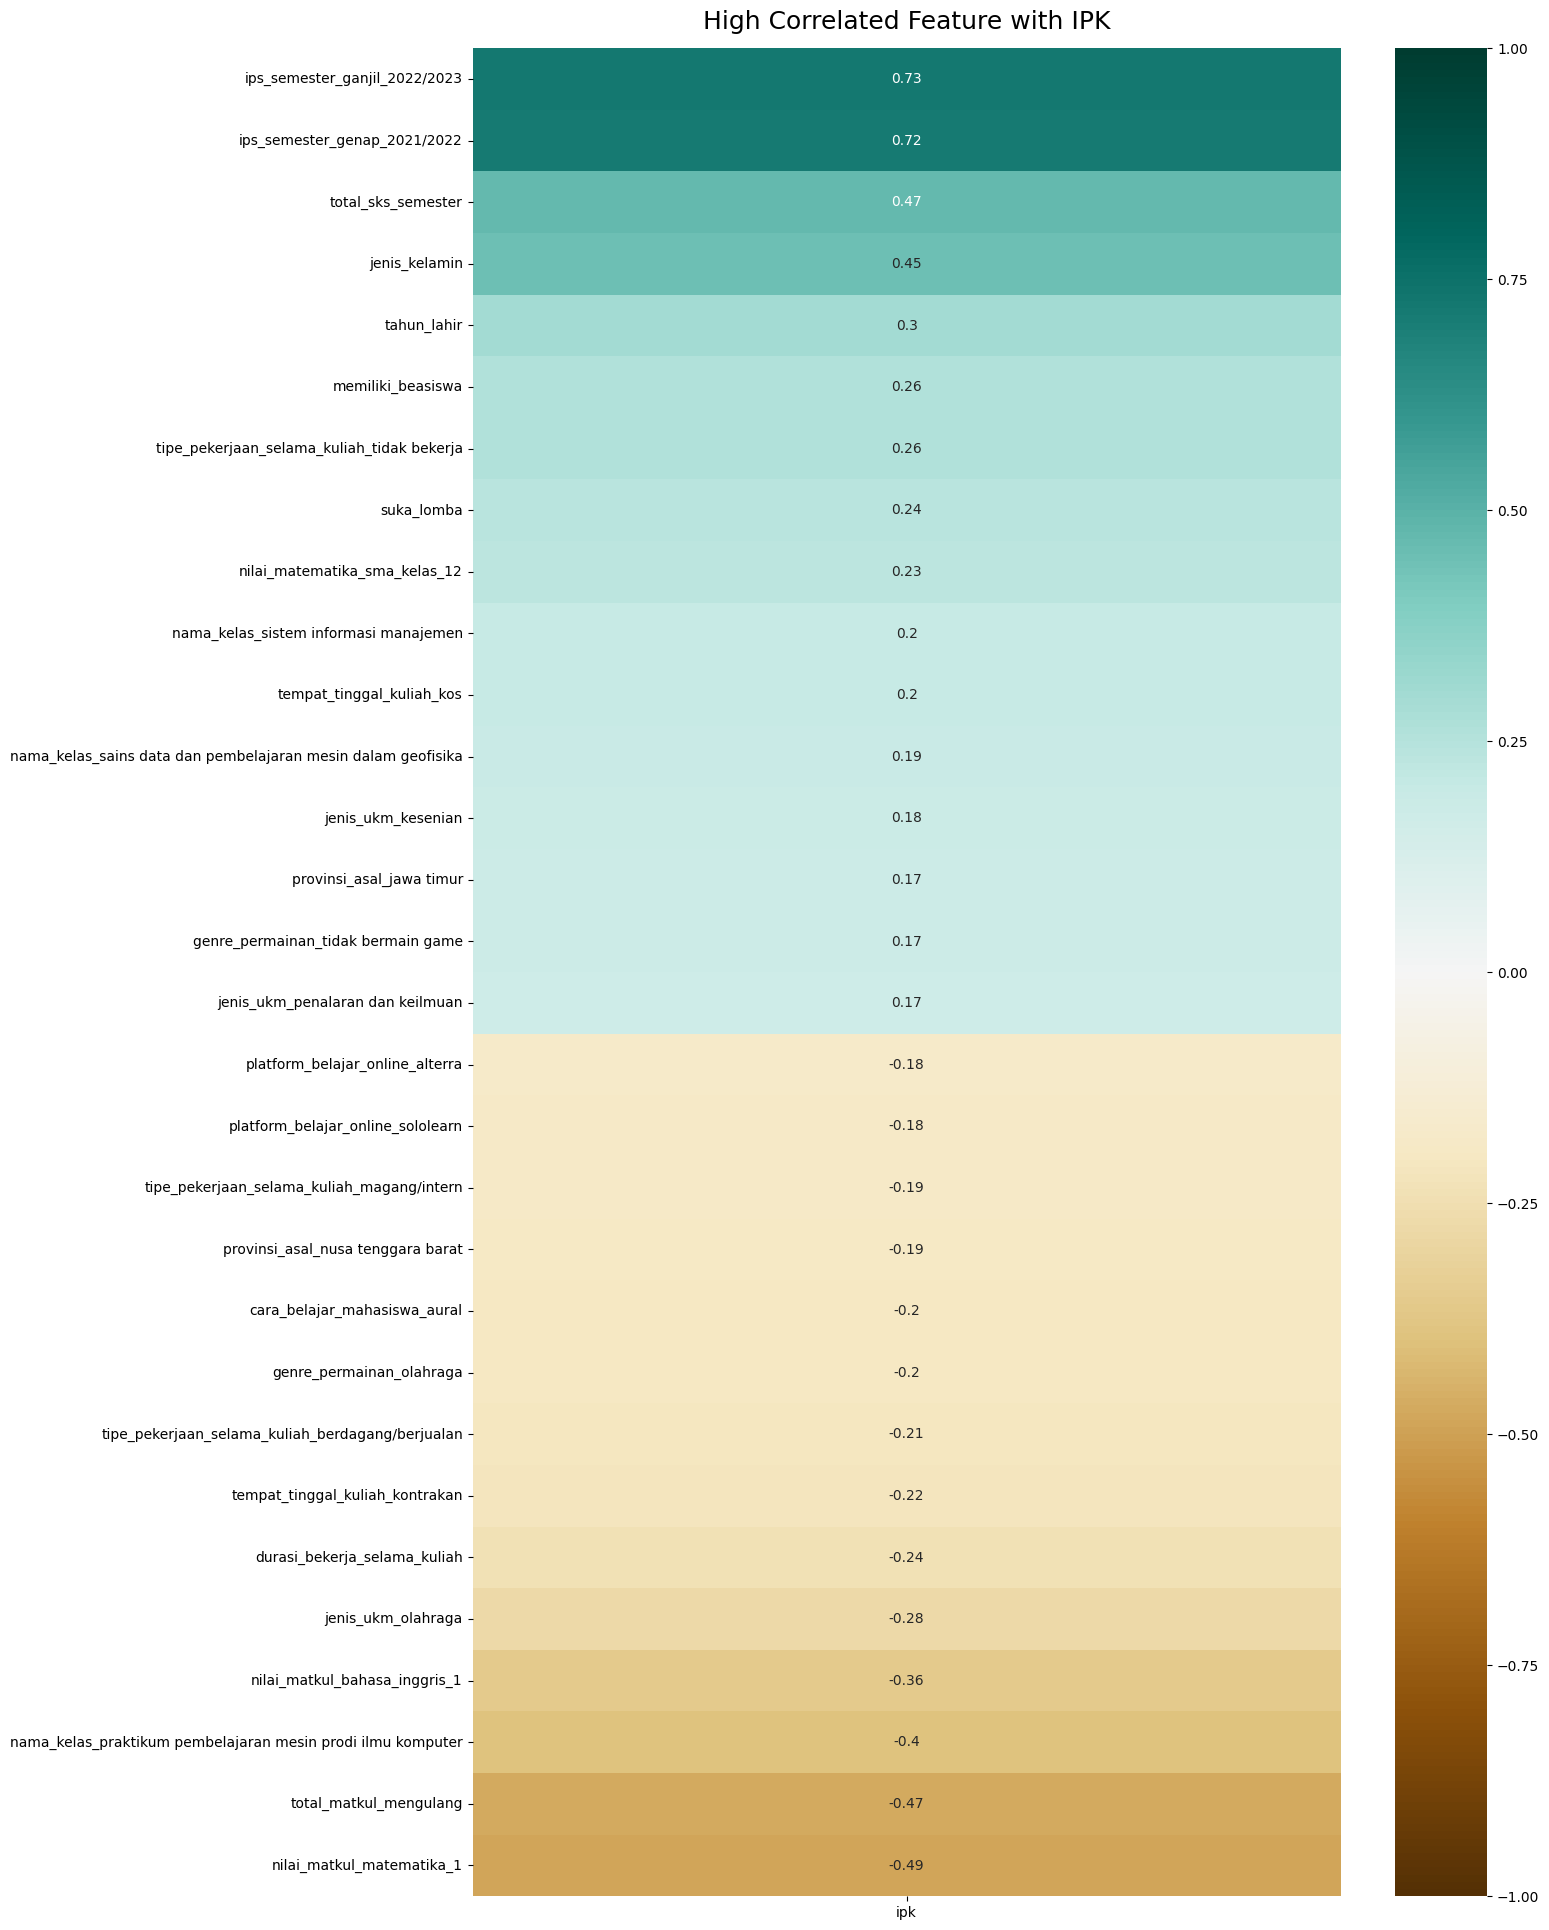

In [221]:
# display(abs(corr_ipk).sort_values(ascending=False)[:30])
high_ipk_corr_feature = abs(corr_ipk).sort_values(by='ipk', ascending=False)[:30].index
# corr_ipk.loc[high_ipk_corr_feature].sort_values(by='ipk', ascending=False)

plt.figure(figsize=[14, 24])
sns.heatmap(corr_ipk.loc[high_ipk_corr_feature].sort_values(by='ipk', ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.title('High Correlated Feature with IPK', fontdict={'fontsize':18}, pad=14)
plt.show()

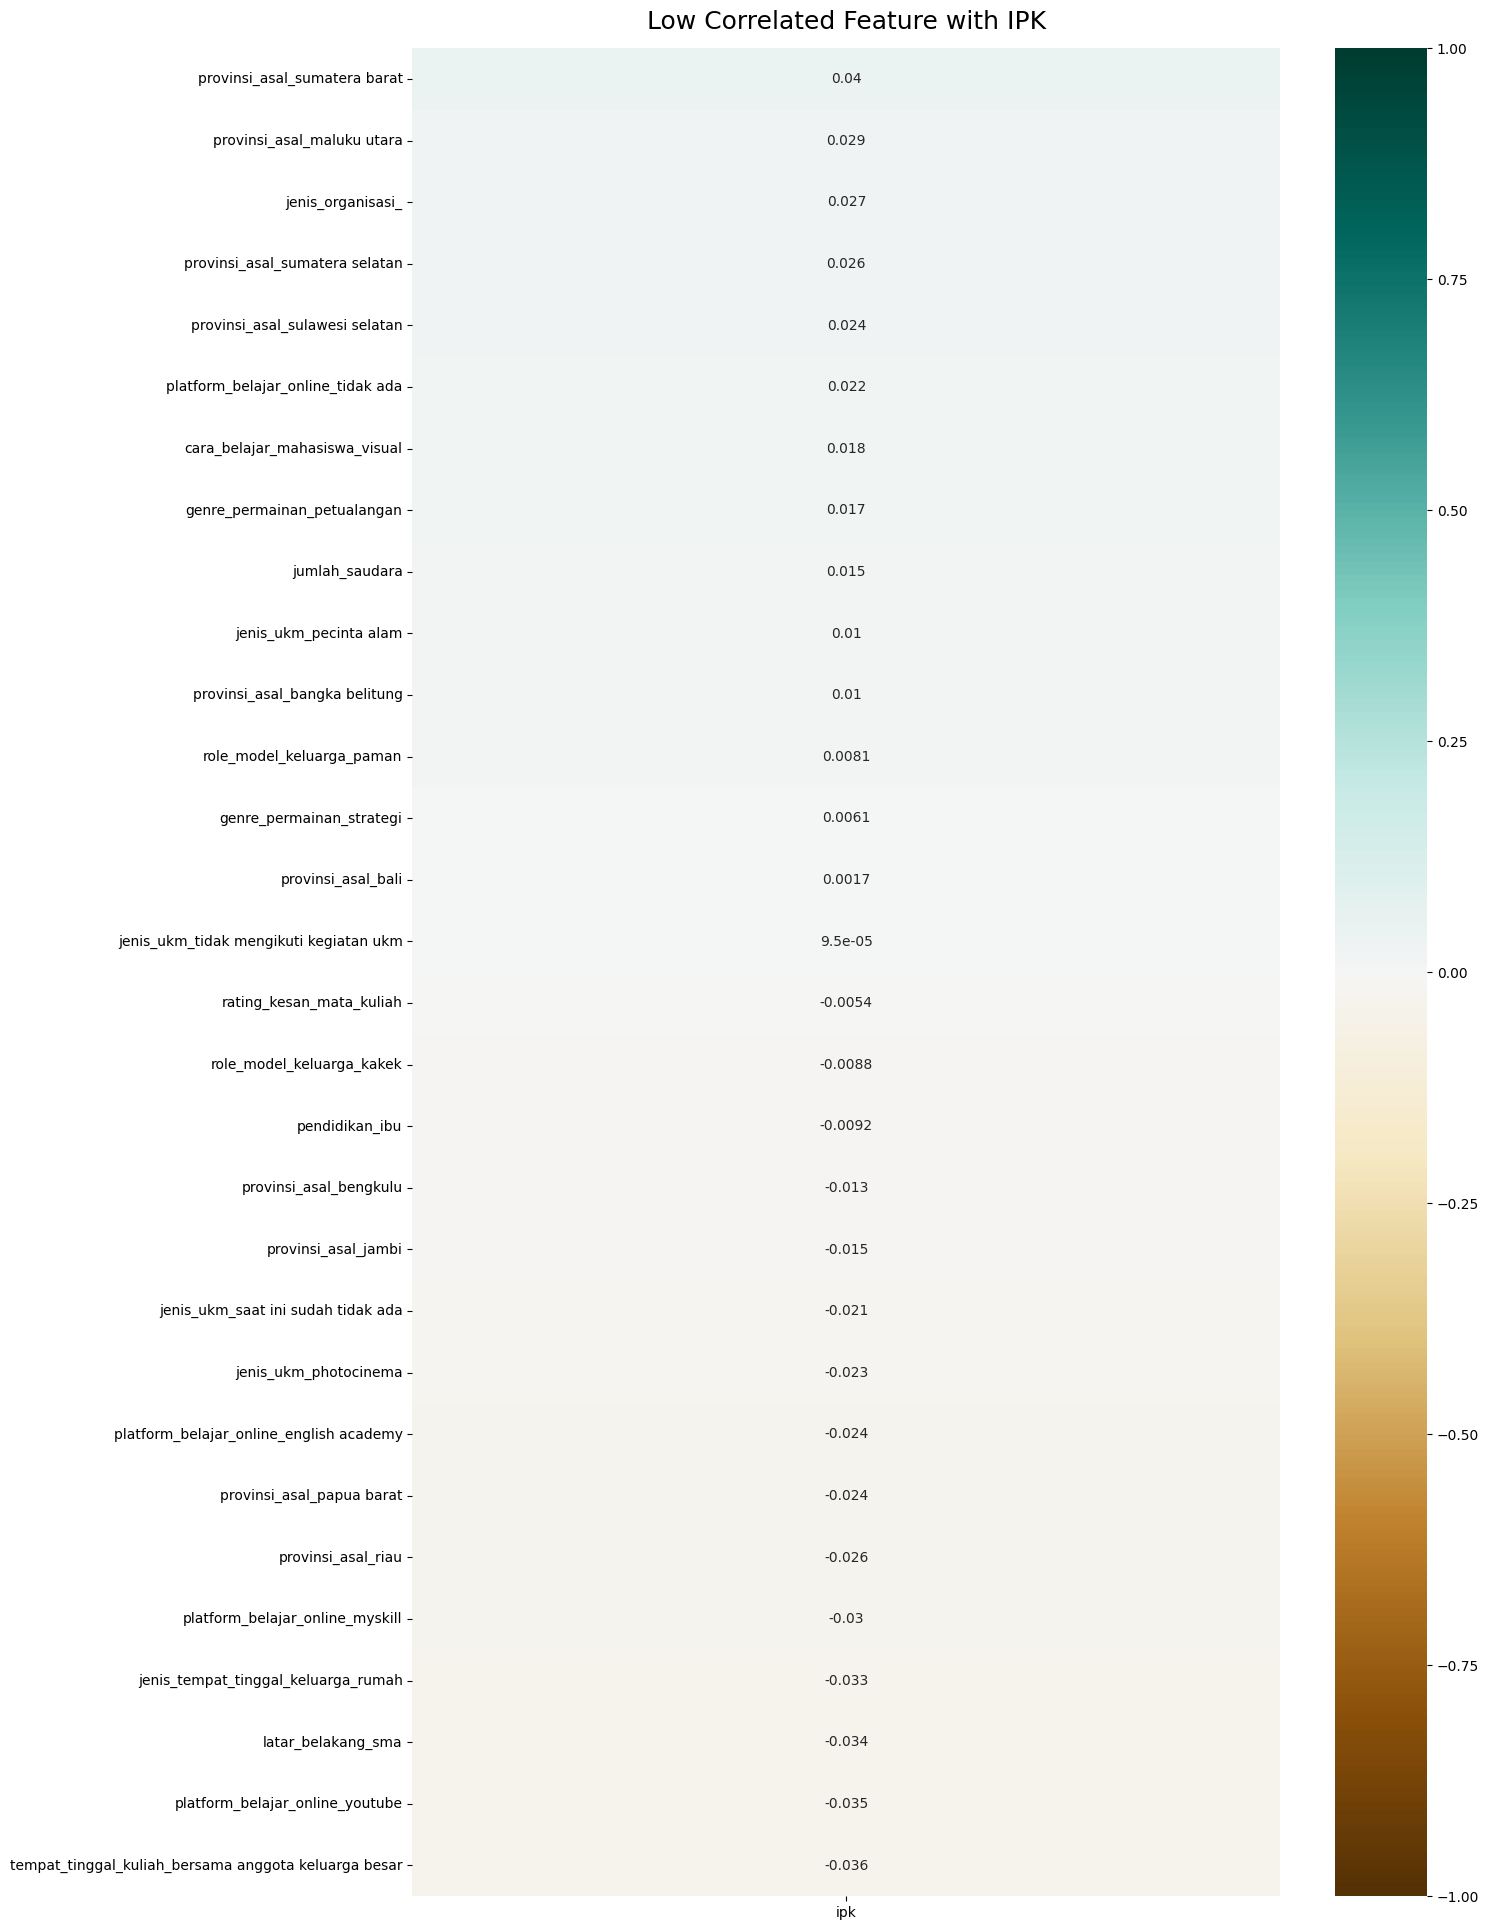

In [223]:
# display(abs(corr_ipk).sort_values(ascending=False)[-30:])
low_ipk_corr_feature = abs(corr_ipk).sort_values(by='ipk', ascending=False)[-30:].index
# corr_ipk.loc[low_ipk_corr_feature].sort_values(by='ipk', ascending=False)

plt.figure(figsize=[14, 24])
sns.heatmap(corr_ipk.loc[low_ipk_corr_feature].sort_values(by='ipk', ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.title('Low Correlated Feature with IPK', fontdict={'fontsize':18}, pad=14)
plt.show()

# Dimensional Reduction

https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598 <br>
https://www.jcchouinard.com/pca-with-python/ <br>
https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/ <br>
https://www.kaggle.com/code/kushal1506/deciding-n-components-in-pca/notebook <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold

### PCA

#### Determine n_component Used from Explained Variance

In [113]:
df_student_class = df_transformed[df_transformed['nama_kelas_sistem informasi manajemen'] == 1]
temp = [x for x in df_student_class if x.startswith('nama_kelas_')]
df_student_class = df_student_class.drop(columns=temp)

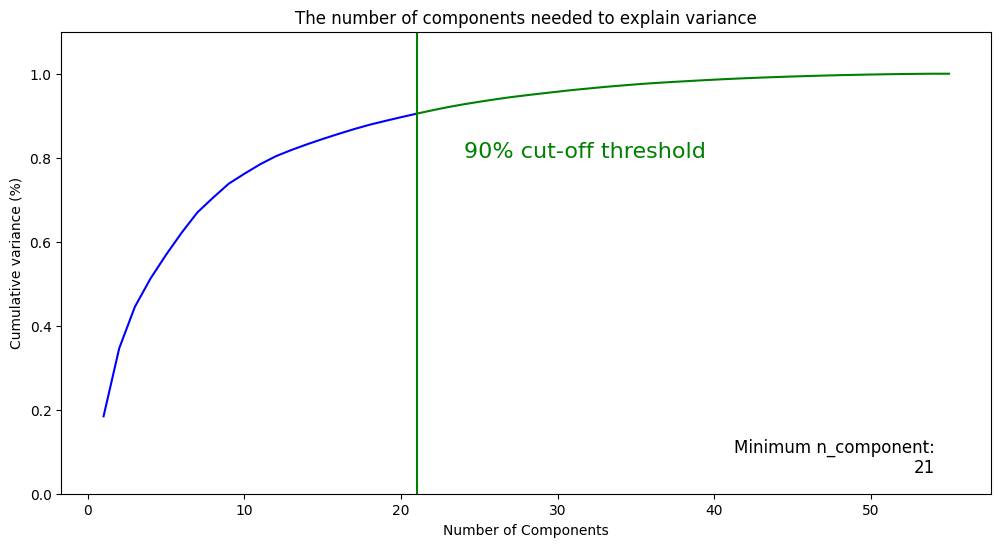

Minimum n_component that above threshold: 21


In [114]:
pca = PCA()
pca.fit(df_student_class)

number_components = np.arange(1, pca.n_components_ + 1, step=1)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

cum_var_threshold = 0.9
cum_var_above_threshold = [x+1 for x in range(len(cumulative_explained_variance)) if cumulative_explained_variance[x] >= cum_var_threshold]

fig, ax = plt.subplots(figsize=[12, 6])

plt.ylim(0.0,1.1)
# plt.plot(number_components, cumulative_explained_variance, marker='.', linestyle='-', color='b')
plt.plot(number_components[:cum_var_above_threshold[0]], cumulative_explained_variance[:cum_var_above_threshold[0]], linestyle='-', color='b')
plt.plot(number_components[cum_var_above_threshold[0] - 1:], cumulative_explained_variance[cum_var_above_threshold[0] - 1:], linestyle='-', color='g')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.n_components_ + 1, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

# plt.axhline(y=cum_var_threshold, color='r', linestyle='-')
plt.axvline(x=cum_var_above_threshold[0], color='g', linestyle='-')
plt.text(cum_var_above_threshold[0]+3, 0.80, f'{int(cum_var_threshold*100)}% cut-off threshold', color = 'g', fontsize=16)
plt.text(pca.n_components_*0.75, 0.05, f'Minimum n_component:\n{cum_var_above_threshold[0]}', color = 'black', fontsize=12, multialignment='right')

plt.show()

print(f'Minimum n_component that above threshold: {cum_var_above_threshold[0]}')

#### Applying PCA to Dataset

In [115]:
pca = PCA(n_components=cum_var_above_threshold[0])
dataset_pca = pca.fit_transform(df_student_class)

df_pca = pd.DataFrame(dataset_pca,
                     columns=[f'PC{x}' for x in range(cum_var_above_threshold[0])])
df_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.154415,-1.374581,2.212971,-0.613855,-2.290700,-0.861788,-1.042804,3.401723,-0.837952,-0.805054,...,0.277522,0.171264,-0.207455,0.156150,-0.515029,0.252273,-0.205621,0.204573,0.591369,-0.607347
1,1.291225,-1.365399,1.399420,-1.348920,0.804755,-0.399638,2.841903,-0.075348,-0.670732,-1.008303,...,-0.848966,-0.863994,0.434236,-0.198111,-0.734834,-0.720626,-0.050199,-0.875175,0.205732,0.034868
2,-1.822564,2.629616,0.047403,-1.045887,-0.961545,-0.412286,2.459030,0.251762,0.523458,0.371215,...,0.809233,-0.750312,0.351474,0.274437,0.220075,-0.696831,-0.289594,0.252887,1.026055,0.244039
3,-0.446241,0.575860,-2.710459,1.213240,0.115586,-0.184212,1.417889,1.494341,-0.125885,-0.028867,...,0.502970,0.372708,-0.178322,-0.018031,-0.631975,0.840028,-0.559151,0.950841,-0.337224,0.295277
4,4.956216,3.947952,0.634499,0.267457,0.148398,-2.399037,-0.655766,-0.305049,-0.457792,2.079030,...,0.312901,-0.839984,1.104650,-0.393710,-1.138469,0.620253,1.061208,0.047608,-0.254227,-0.242100
5,-1.396285,5.074159,1.212825,-1.119481,-0.311099,-0.121584,0.822469,0.220315,-1.583825,0.263143,...,0.332648,0.351904,-1.156988,0.303298,0.422490,0.773253,0.811146,-0.069753,-0.149958,0.330094
6,-3.631875,-1.516040,-2.053558,-2.959883,-0.249863,0.771383,-1.315170,0.824905,-0.321300,-1.019695,...,1.336764,-0.642794,0.582229,1.069251,-0.134670,-0.549276,0.275341,0.247101,-0.357400,-0.530704
7,2.605488,-1.142336,-0.657190,-2.685459,-0.950142,2.355544,-0.359008,1.427642,0.488182,1.594760,...,0.195765,-0.039252,1.400078,0.201229,-0.595755,-0.677743,-0.640510,-0.833112,-0.535935,1.425905
8,-1.683662,-2.187831,0.979092,2.232732,-0.422664,-0.144160,0.331756,1.753015,2.435082,-0.178172,...,-1.182394,-0.372408,-0.049724,0.560989,0.956183,0.114819,1.022860,0.282357,0.025047,0.271245
9,1.311751,2.843204,4.443356,0.523898,1.749750,0.188411,-1.021435,0.021446,-1.375823,-1.339426,...,-0.400884,0.585812,1.603303,-0.374233,0.580730,-0.276028,-0.221479,0.431557,-0.532288,0.811770


# Convert Dataset For Modeling Purpose

In [116]:
df_pca.to_csv('dataset_kuisioner_modelling.csv', index=False)

In [117]:
df_student_class.to_csv('dataset_kuisioner_modelling.csv', index=False)